# **CHATGPT**

In [1]:
# EDA for Weather Time Series Data in Google Colab
# -----------------------------------------------
# This notebook demonstrates exploratory data analysis for daily and monthly weather time series.
# It includes:
# - Correlation analysis
# - Additive and multiplicative decomposition
# - Time series plotting
# - Autocorrelation (ACF) and partial autocorrelation (PACF)\# - Moving averages
# - Stationarity tests (ADF, KPSS)
# - Additional diagnostics: rolling statistics, seasonal plots, distribution analysis

In [2]:
# File upload
from google.colab import files
# uploaded = files.upload()

In [3]:
# Cell 2: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import scipy.stats as stats

# Configure plots
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Cell 3: Load Data
# Adjust path to your CSV files
daily = pd.read_csv('TIME-SERIES-Diario-13-23.csv', parse_dates=['Fecha'], index_col='Fecha')
monthly = pd.read_csv('TIME-SERIES-Diario-13-23.csv', parse_dates=['Fecha'], index_col='Fecha')

In [5]:
# Quick look
print("Daily data shape:", daily.shape)
print(daily.head())
print("Monthly data shape:", monthly.shape)
print(monthly.head())

Daily data shape: (3883, 8)
             Año  Mes  Dia  Tｰ Media  TｰMaxima  TｰMinima  Lluvia  %Humedad
Fecha                                                                     
2013-01-01  2013  Ene    1    12.038    18.022     7.344   0.956    73.676
2013-01-02  2013  Ene    2    12.224    18.000     8.078   3.600    74.553
2013-01-03  2013  Ene    3    11.902    17.822     7.667   9.933    76.719
2013-01-04  2013  Ene    4    10.906    16.778     7.122   8.800    79.117
2013-01-05  2013  Ene    5    11.146    16.267     7.211   4.956    79.746
Monthly data shape: (3883, 8)
             Año  Mes  Dia  Tｰ Media  TｰMaxima  TｰMinima  Lluvia  %Humedad
Fecha                                                                     
2013-01-01  2013  Ene    1    12.038    18.022     7.344   0.956    73.676
2013-01-02  2013  Ene    2    12.224    18.000     8.078   3.600    74.553
2013-01-03  2013  Ene    3    11.902    17.822     7.667   9.933    76.719
2013-01-04  2013  Ene    4    10.906    16

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


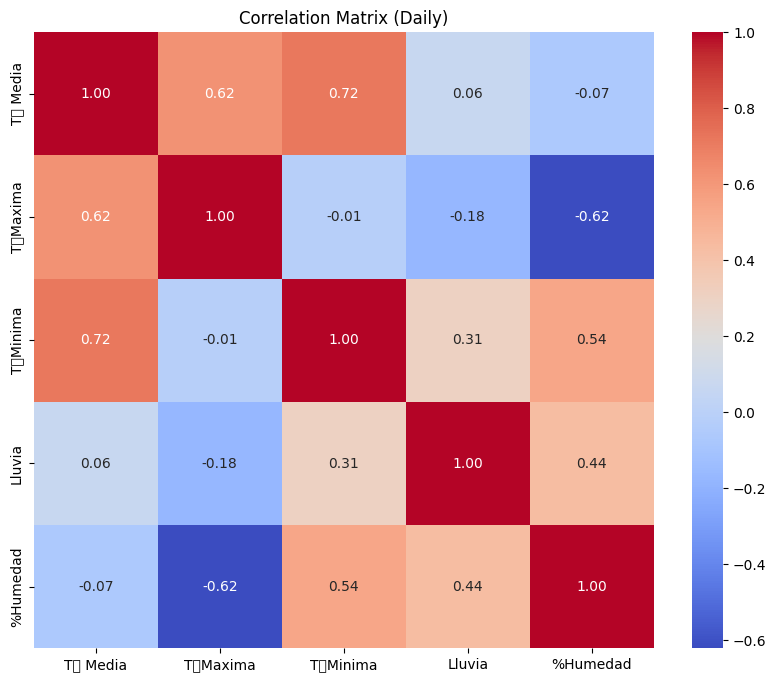

In [6]:
# Cell 4: Correlation Analysis
# Combine variables if needed
data = daily.copy().dropna()
# Drop non-numeric columns for correlation
data_numeric = data.drop(columns=['Año', 'Mes', 'Dia'])
# Compute correlation matrix
corr = data_numeric.corr()
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
# Update font properties for wider character support
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Segoe UI', 'Arial'] # Add more fonts
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Daily)')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


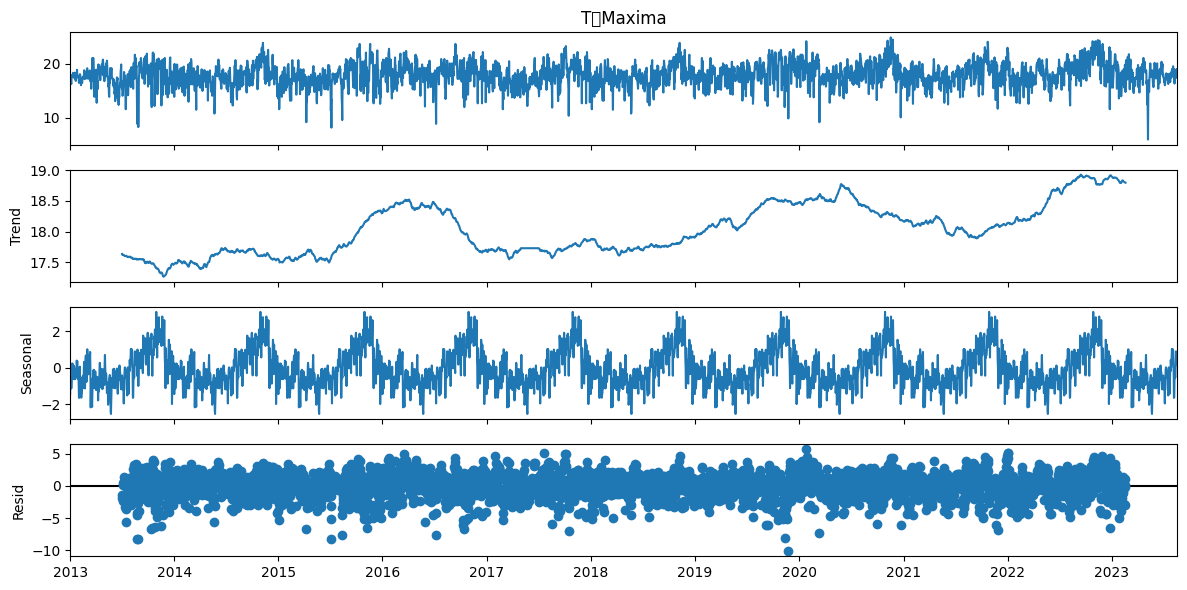

/tmp/ipython-input-12-4147830423.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['temperature_max_nonzero'] = data['TｰMaxima'].replace(0, np.nan).fillna(method='bfill')


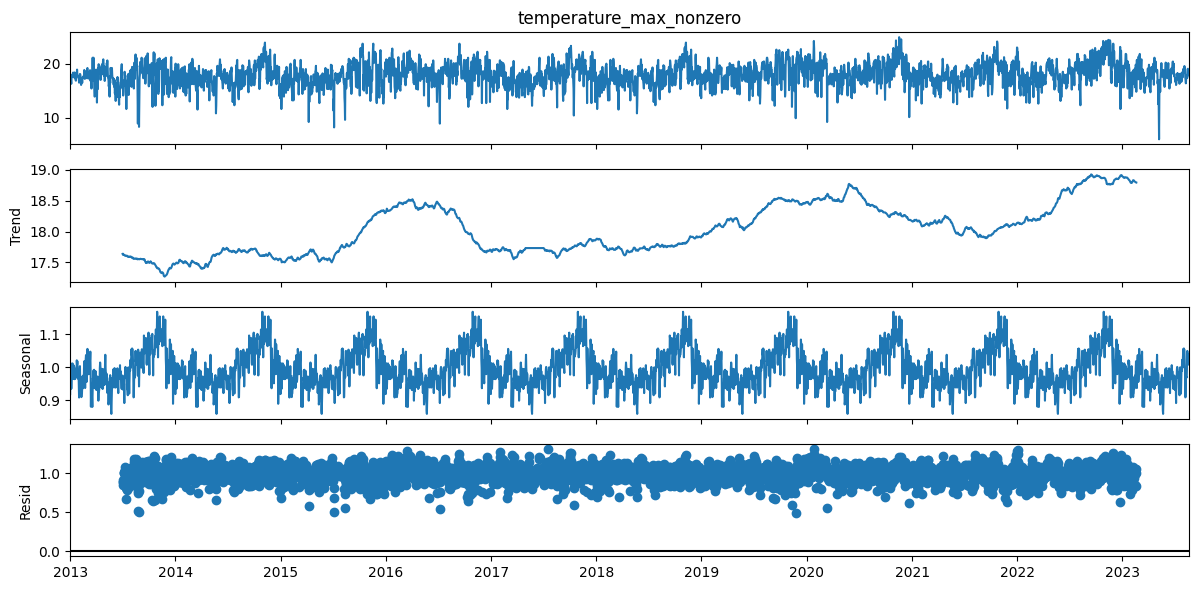

In [12]:
# Cell 6: Decomposition
# Additive
decomp_add = seasonal_decompose(data['TｰMaxima'], model='additive', period=365)
decomp_add.plot(); plt.suptitle(''); plt.show()
# Multiplicative (handle zeros by small epsilon)
data['temperature_max_nonzero'] = data['TｰMaxima'].replace(0, np.nan).fillna(method='bfill')
decomp_mul = seasonal_decompose(data['temperature_max_nonzero'], model='multiplicative', period=365)
decomp_mul.plot(); plt.suptitle(''); plt.show()

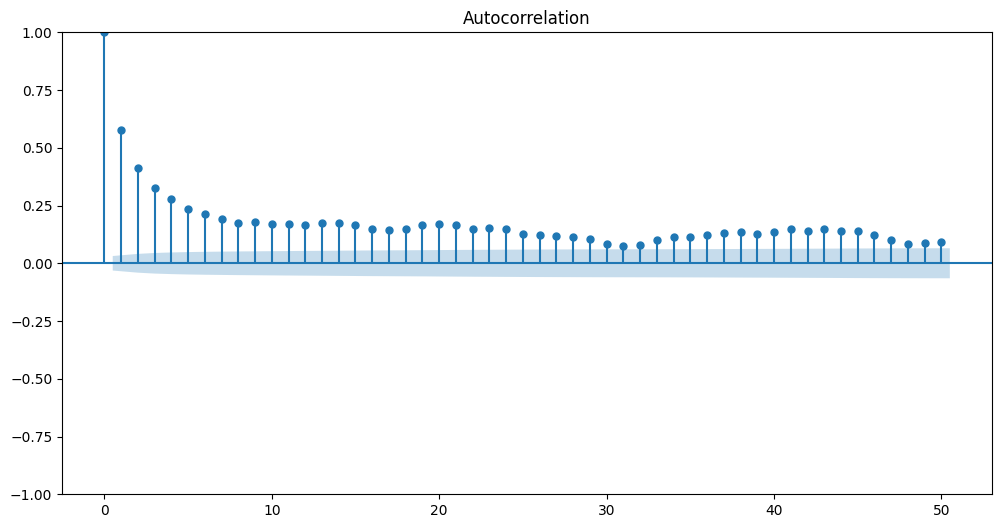

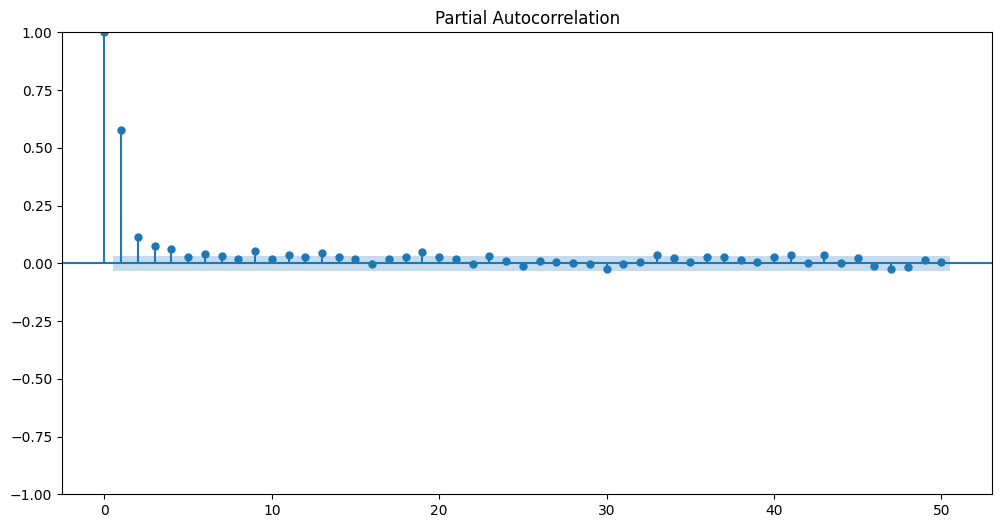

In [13]:
# Cell 7: ACF and PACF
plot_acf(data['TｰMaxima'].dropna(), lags=50); plt.show()
plot_pacf(data['TｰMaxima'].dropna(), lags=50, method='ywm'); plt.show()

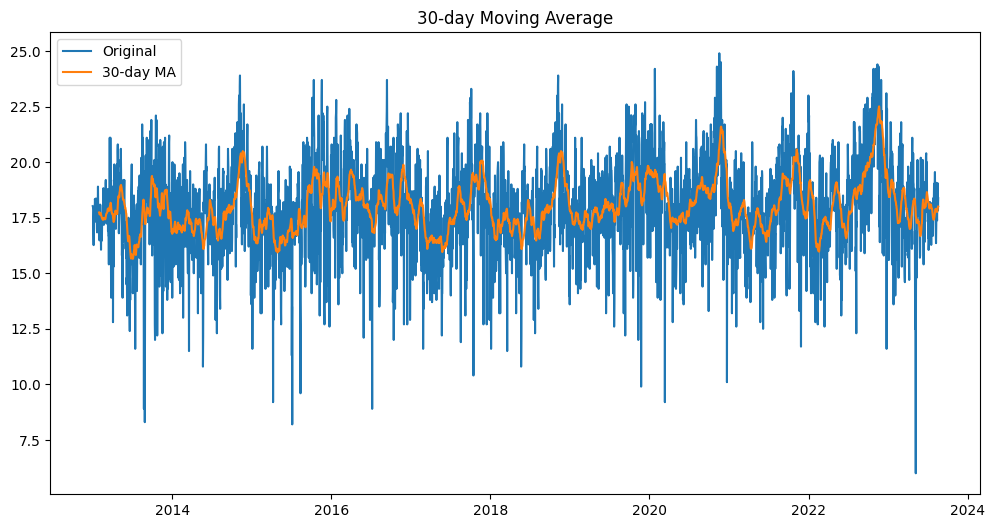

In [14]:
# Cell 8: Moving Averages
# Rolling mean & std
data['rolling_mean_30'] = data['TｰMaxima'].rolling(window=30).mean()
data['rolling_std_30'] = data['TｰMaxima'].rolling(window=30).std()
plt.figure()
plt.plot(data['TｰMaxima'], label='Original')
plt.plot(data['rolling_mean_30'], label='30-day MA')
plt.legend(); plt.title('30-day Moving Average'); plt.show()

In [15]:
# Cell 9: Stationarity Tests
# ADF test
def adf_test(series, signif=0.05):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, val in result[4].items(): print(f'  {key}: {val}')
    print('Stationary' if result[1] < signif else 'Non-Stationary')

# KPSS test
def kpss_test(series, signif=0.05):
    result = kpss(series.dropna(), regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, val in result[3].items(): print(f'  {key}: {val}')
    print('Stationary' if result[1] > signif else 'Non-Stationary')

print('ADF Test (Daily temperature_max)')
adf_test(data['TｰMaxima'])
print('\nKPSS Test (Daily temperature_max)')
kpss_test(data['TｰMaxima'])

ADF Test (Daily temperature_max)
ADF Statistic: -8.54021203571875
p-value: 9.829438050220088e-14
  1%: -3.4320439297567704
  5%: -2.8622884853022255
  10%: -2.5671684279459126
Stationary

KPSS Test (Daily temperature_max)
KPSS Statistic: 0.8907984400449175
p-value: 0.01
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Non-Stationary


/tmp/ipython-input-15-3955700384.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


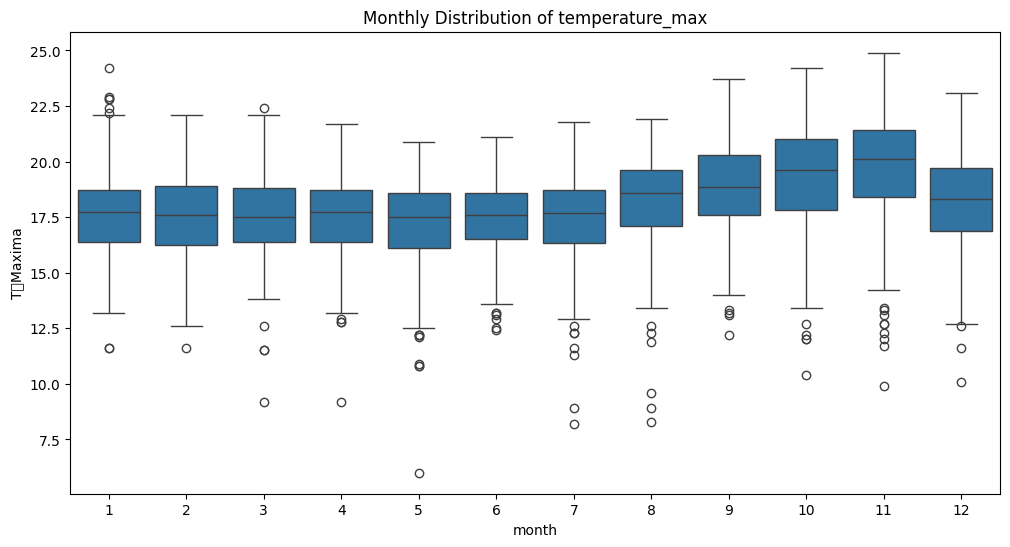

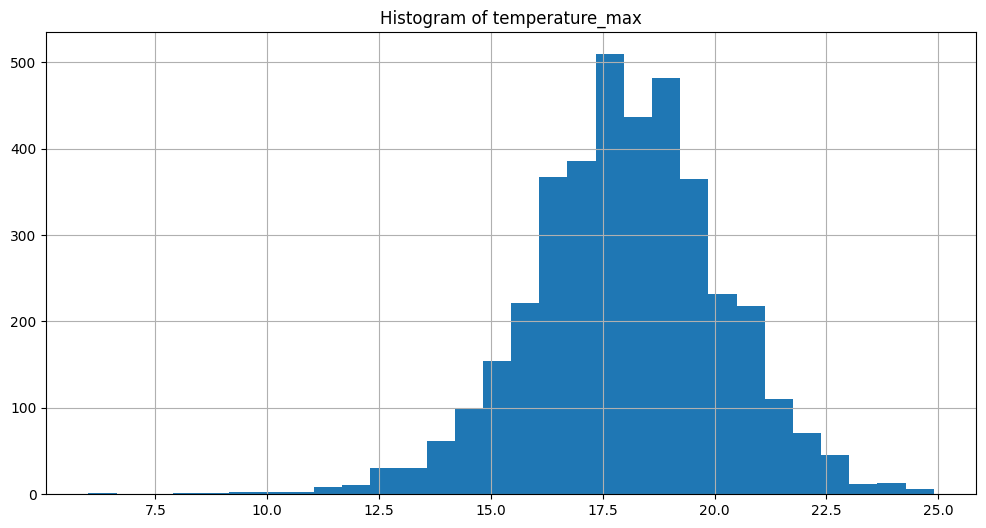

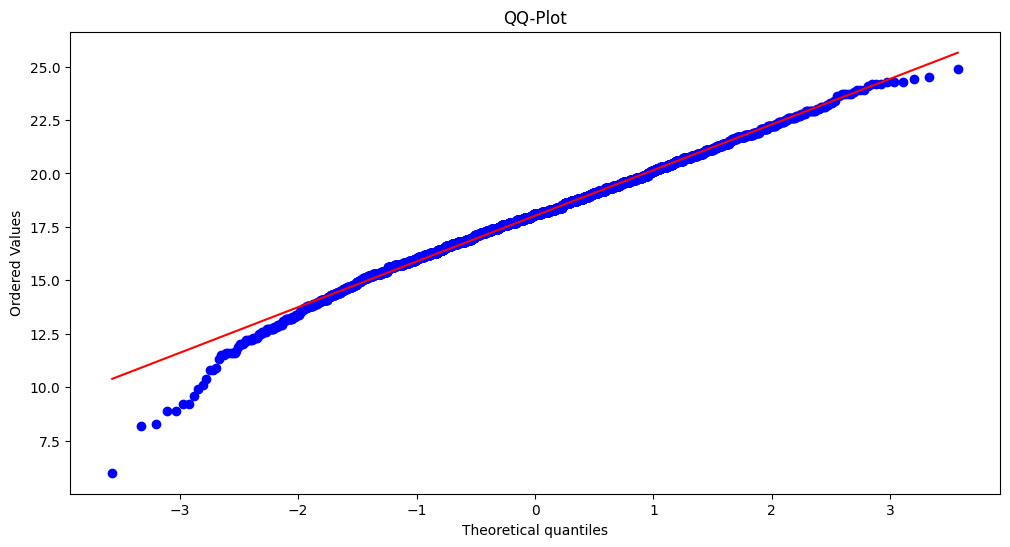

In [16]:
# Cell 10: Additional Diagnostics
# Seasonal Boxplot by Month
data['month'] = data.index.month
sns.boxplot(x='month', y='TｰMaxima', data=data)
plt.title('Monthly Distribution of temperature_max')
plt.show()

# Histogram & QQ-plot
data['TｰMaxima'].hist(bins=30); plt.title('Histogram of temperature_max'); plt.show()
stats.probplot(data['TｰMaxima'].dropna(), dist='norm', plot=plt); plt.title('QQ-Plot'); plt.show()

# **GROK**

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Cell 3: Load Data
# Adjust path to your CSV files
df = pd.read_csv('TIME-SERIES-Diario-13-23.csv', parse_dates=['Fecha'], index_col='Fecha')
df_monthly = pd.read_csv('TIME-SERIES-Mensual-86-23.csv', parse_dates=['Fecha'], index_col='Fecha')

In [30]:
# Display first few rows
print('Daily Data:')
print(df.head())
print('\nMonthly Data:')
print(df_monthly.head())

Daily Data:
             Año  Mes  Dia  Tｰ Media  TｰMaxima  TｰMinima  Lluvia  %Humedad
Fecha                                                                     
2013-01-01  2013  Ene    1    12.038    18.022     7.344   0.956    73.676
2013-01-02  2013  Ene    2    12.224    18.000     8.078   3.600    74.553
2013-01-03  2013  Ene    3    11.902    17.822     7.667   9.933    76.719
2013-01-04  2013  Ene    4    10.906    16.778     7.122   8.800    79.117
2013-01-05  2013  Ene    5    11.146    16.267     7.211   4.956    79.746

Monthly Data:
               Año  Mes  Tｰ Media  TｰMaxima  TｰMinima  Lluvia  %Humedad
Fecha                                                                  
1986-01-01  1986.0  Ene      11.4      17.3       5.4   100.1       NaN
1986-02-01  1986.0  Feb      11.4      17.2       5.6   152.1       NaN
1986-03-01  1986.0  Mar      11.6      17.6       5.5   115.8       NaN
1986-04-01  1986.0  Abr      10.0      17.2       2.9    44.8       NaN
1986-05-01  1986

<bound method Axes.set_title of <Axes: >>

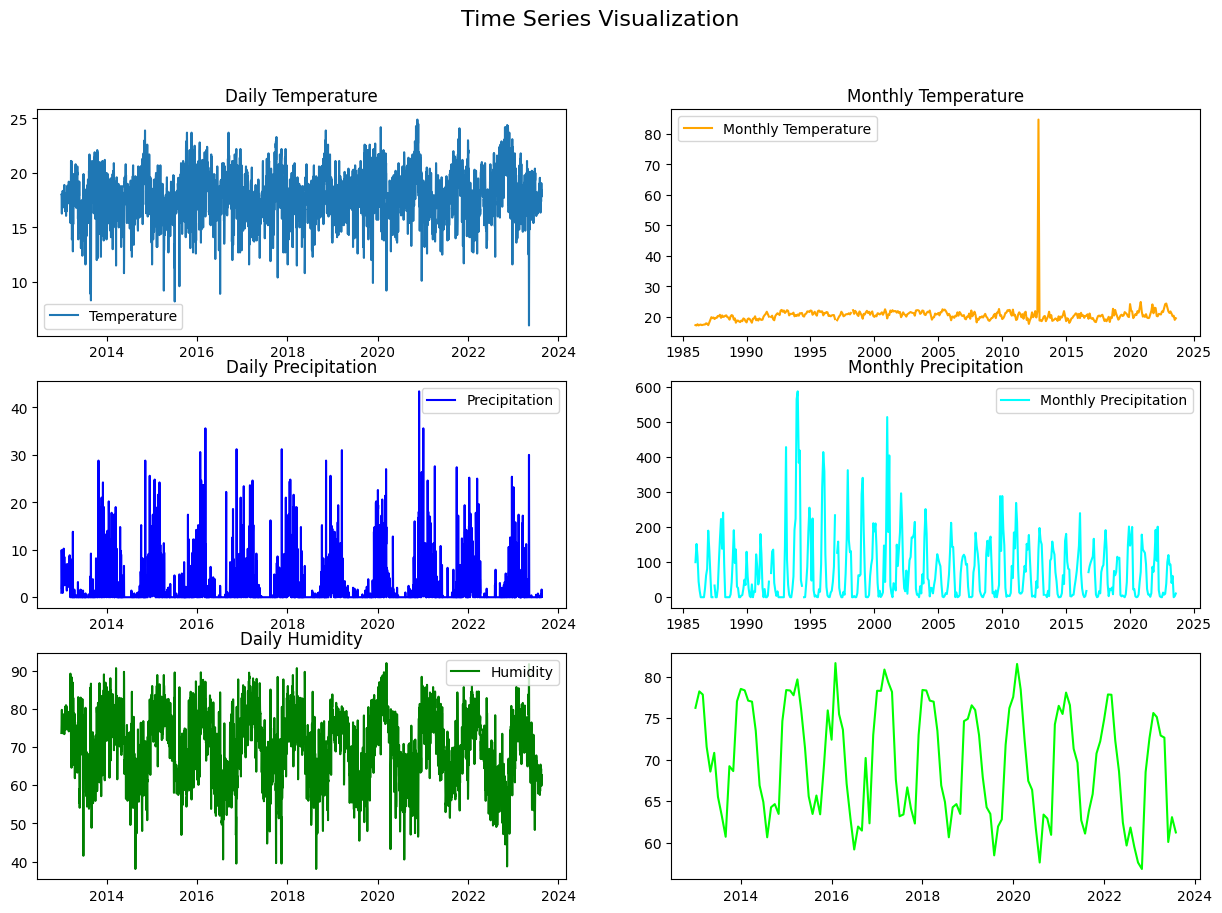

In [31]:
# Time Series Visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Time Series Visualization', fontsize=16)
axes[0, 0].plot(df.index, df['TｰMaxima'], label='Temperature')
axes[0, 0].set_title('Daily Temperature')
axes[0, 0].legend()
axes[0, 1].plot(df_monthly.index, df_monthly['TｰMaxima'], label='Monthly Temperature', color='orange')
axes[0, 1].set_title('Monthly Temperature')
axes[0, 1].legend()

axes[1, 0].plot(df.index, df['Lluvia'], label='Precipitation', color='blue')
axes[1, 0].set_title('Daily Precipitation')
axes[1, 0].legend()
axes[1, 1].plot(df_monthly.index, df_monthly['Lluvia'], label='Monthly Precipitation', color='cyan')
axes[1, 1].set_title('Monthly Precipitation')
axes[1, 1].legend()

axes[2, 0].plot(df.index, df['%Humedad'], label='Humidity', color='green')
axes[2, 0].set_title('Daily Humidity')
axes[2, 0].legend()
axes[2, 1].plot(df_monthly.index, df_monthly['%Humedad'], label='Monthly Humidity', color='lime')
axes[2, 1].set_title

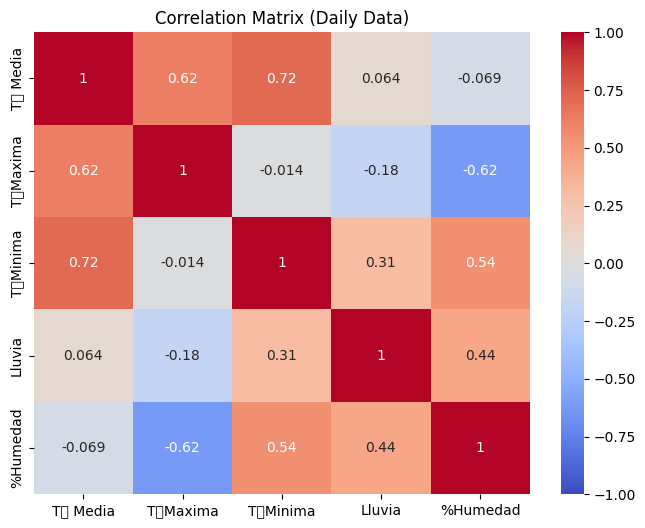

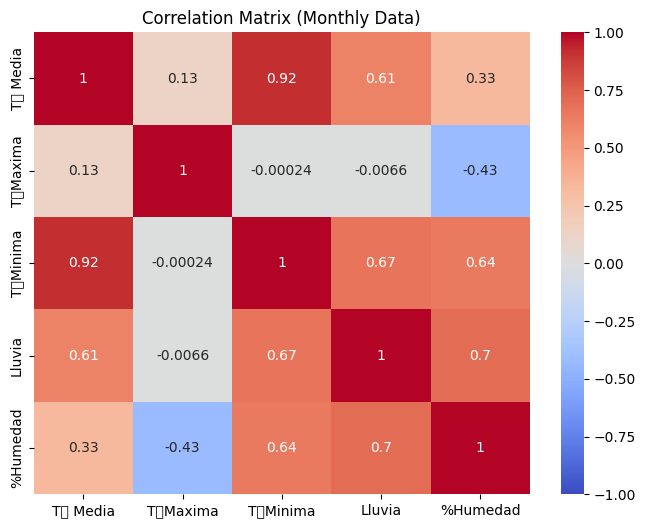

In [32]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
# Drop non-numeric columns before calculating correlation
sns.heatmap(df.drop(columns=['Año', 'Mes', 'Dia']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Daily Data)')
plt.show()

plt.figure(figsize=(8, 6))
# Drop non-numeric columns before calculating correlation
sns.heatmap(df_monthly.drop(columns=['Año', 'Mes']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Monthly Data)')
plt.show()

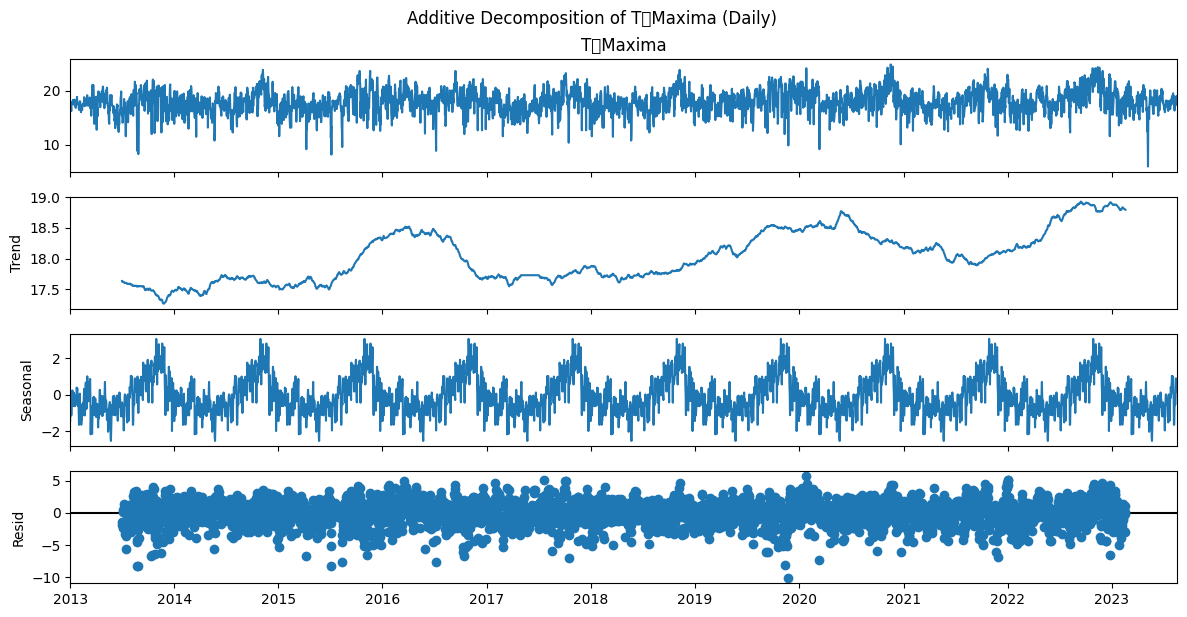

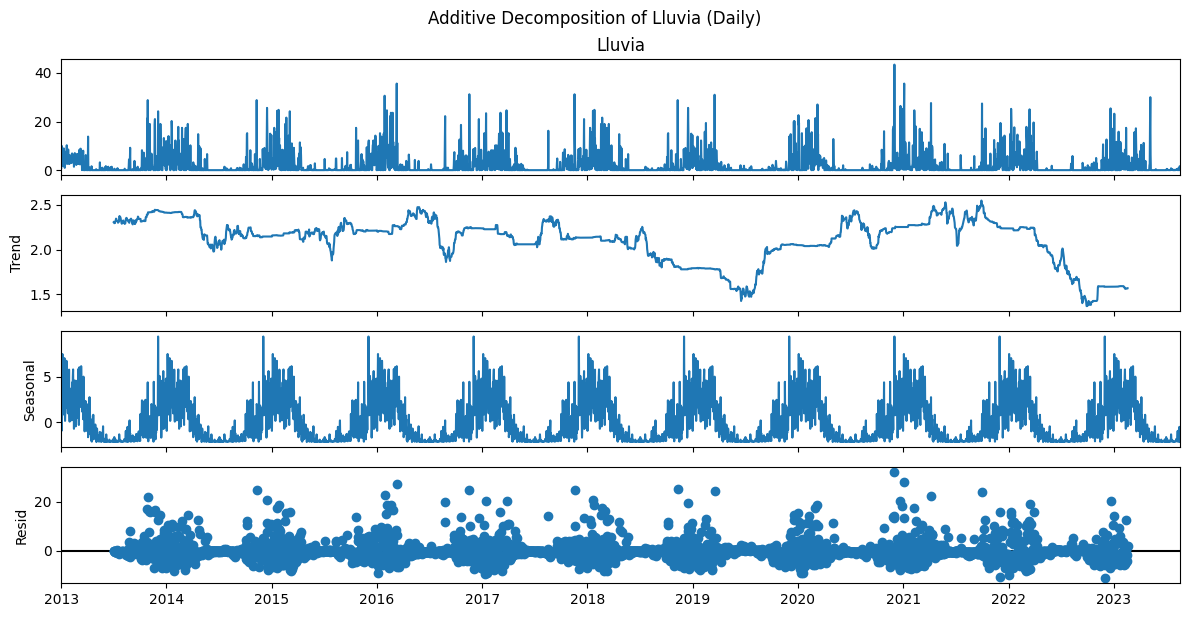

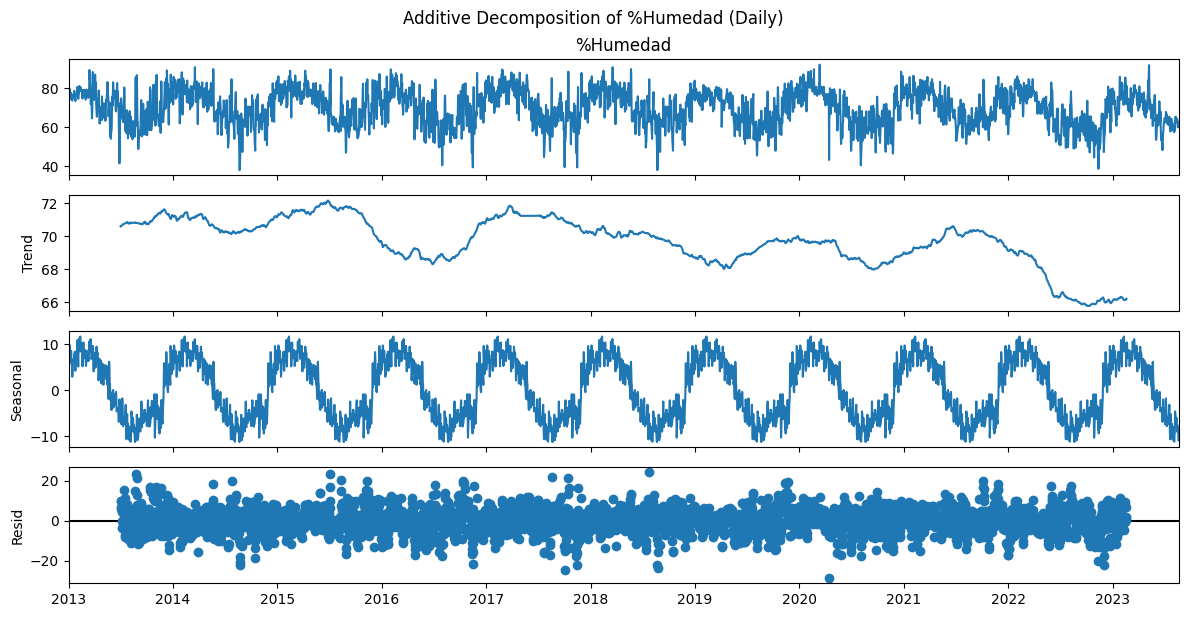

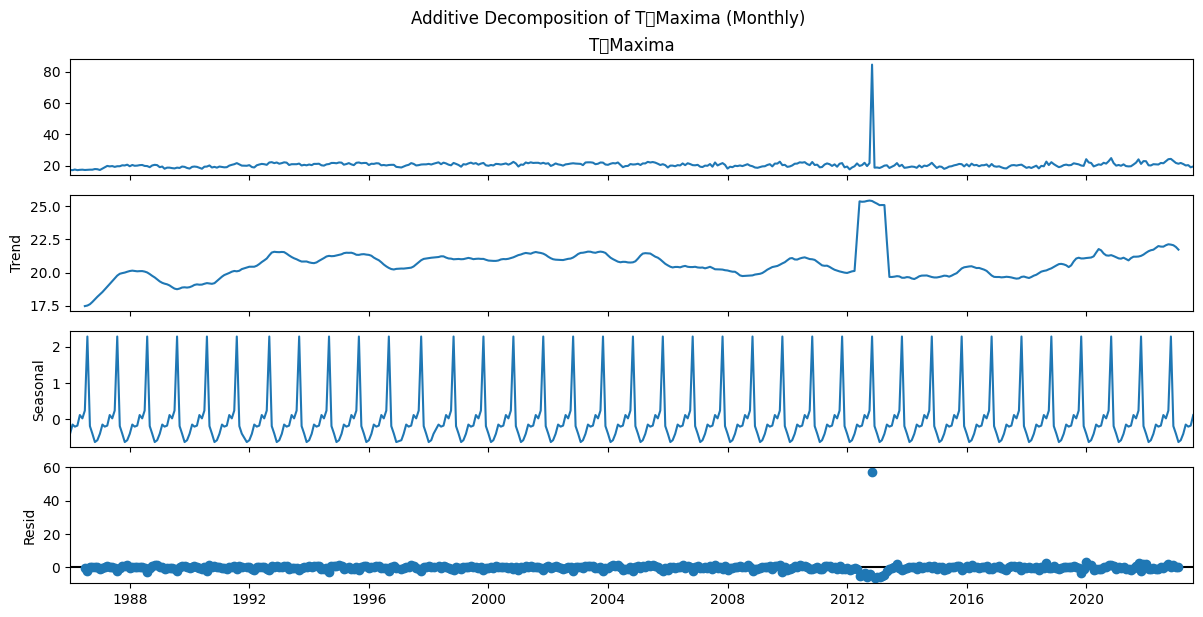

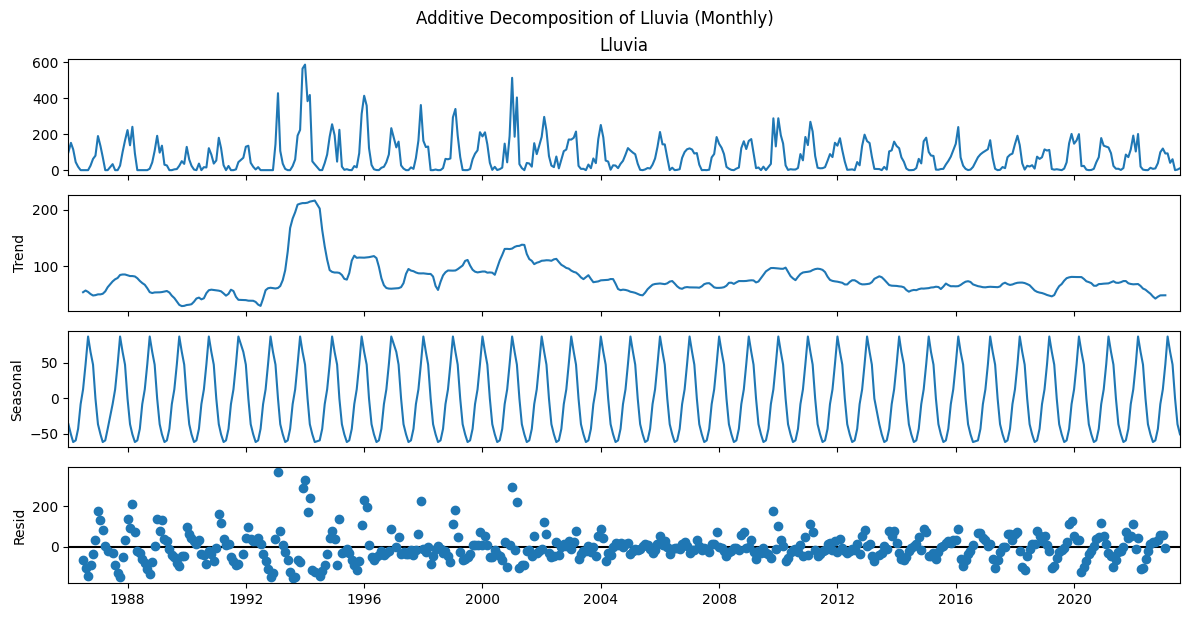

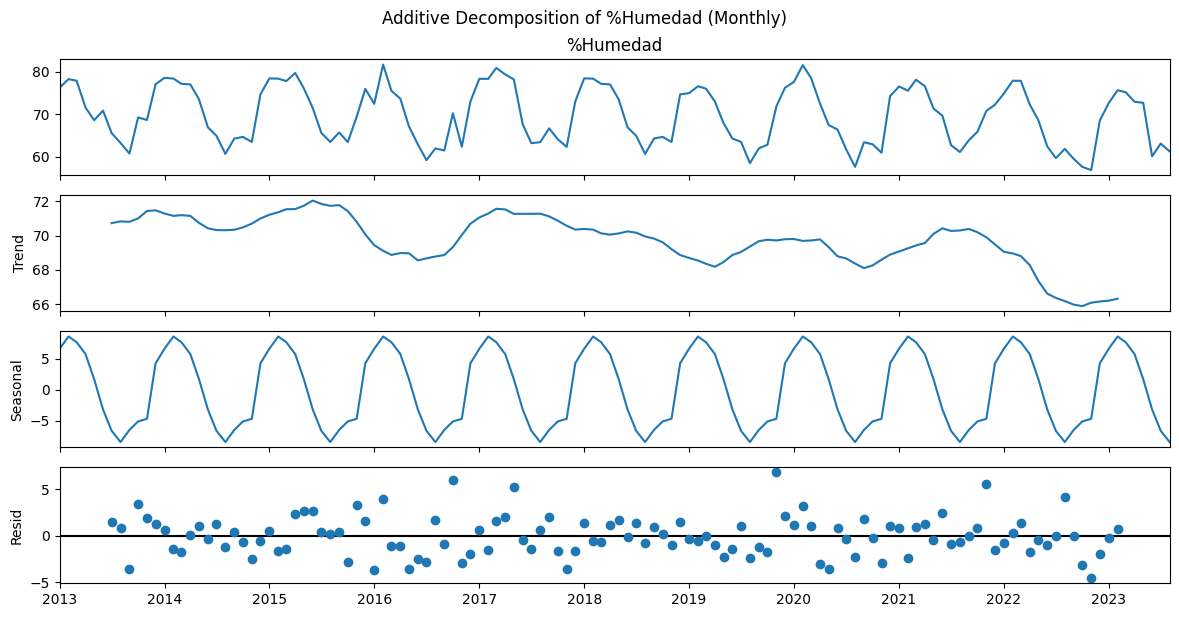

In [36]:
# Decomposition Analysis
for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    decomposition = seasonal_decompose(df[col].dropna(), model='additive', period=365)
    fig = decomposition.plot()
    fig.suptitle(f'Additive Decomposition of {col} (Daily)', y=1.02)
    plt.show()

for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    decomposition = seasonal_decompose(df_monthly[col].dropna(), model='additive', period=12)
    fig = decomposition.plot()
    fig.suptitle(f'Additive Decomposition of {col} (Monthly)', y=1.02)
    plt.show()

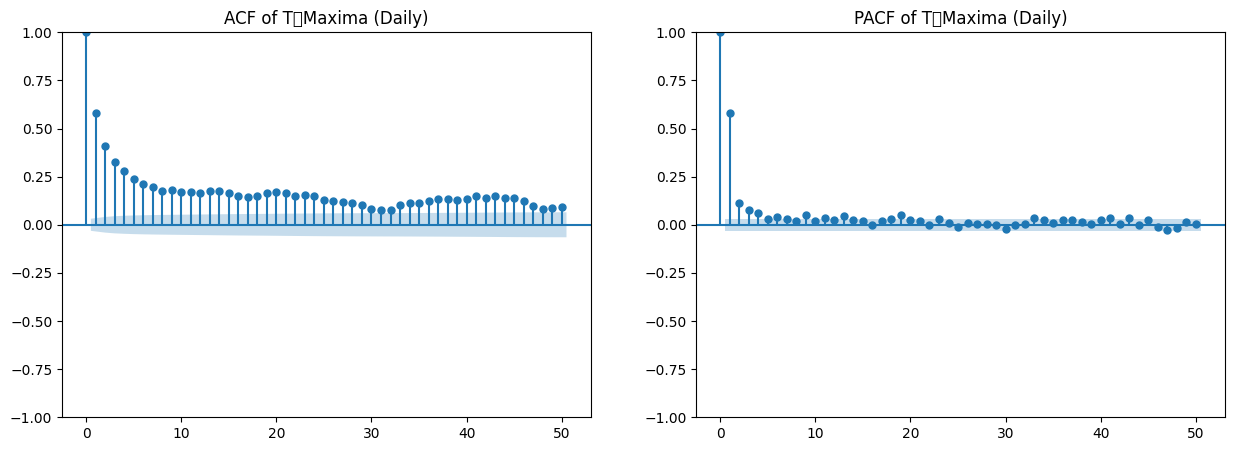

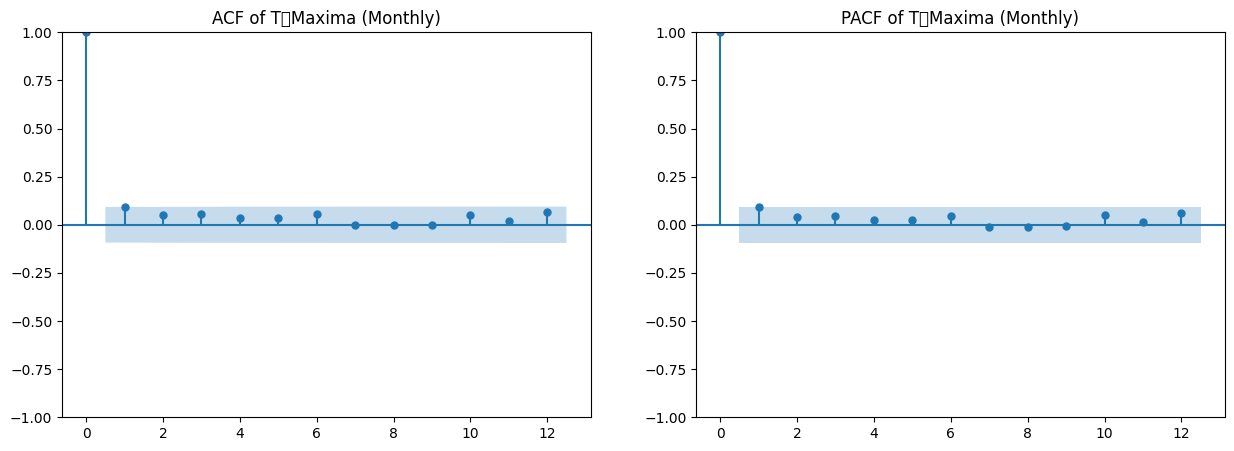

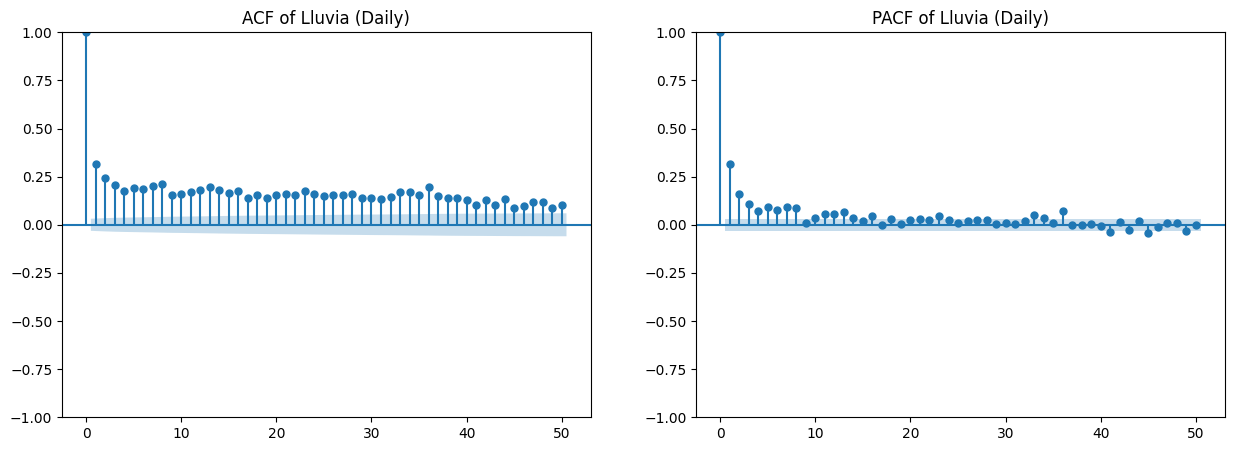

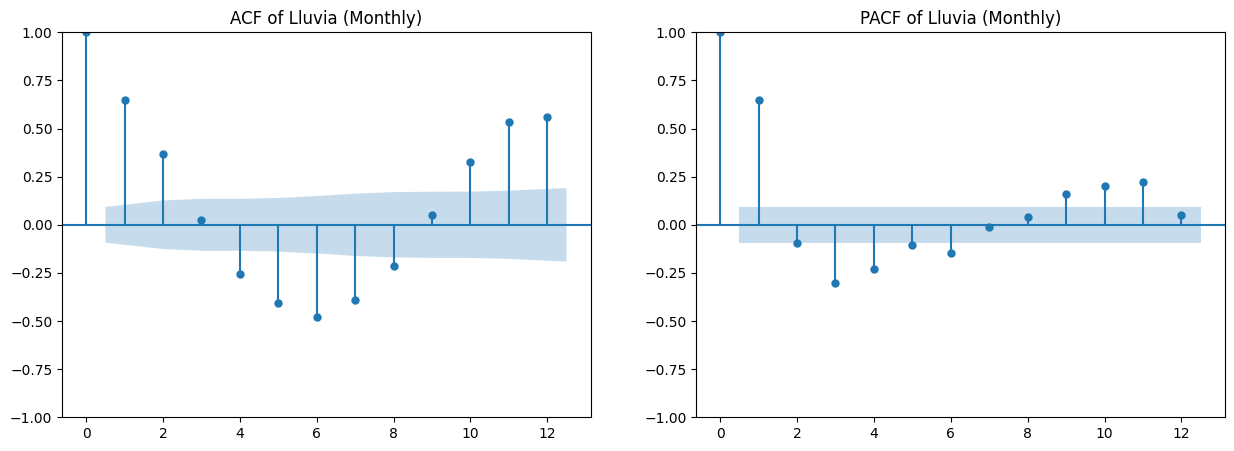

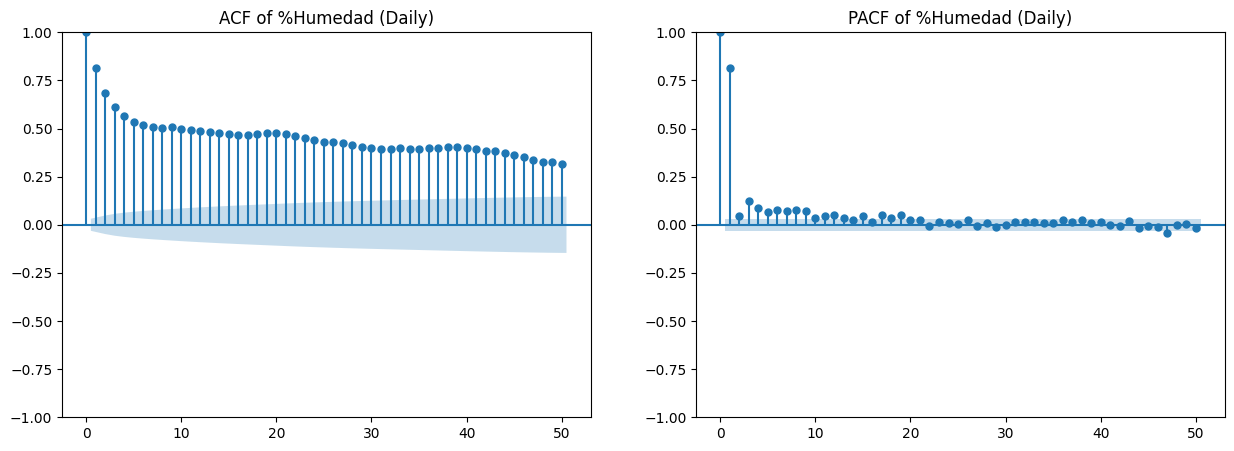

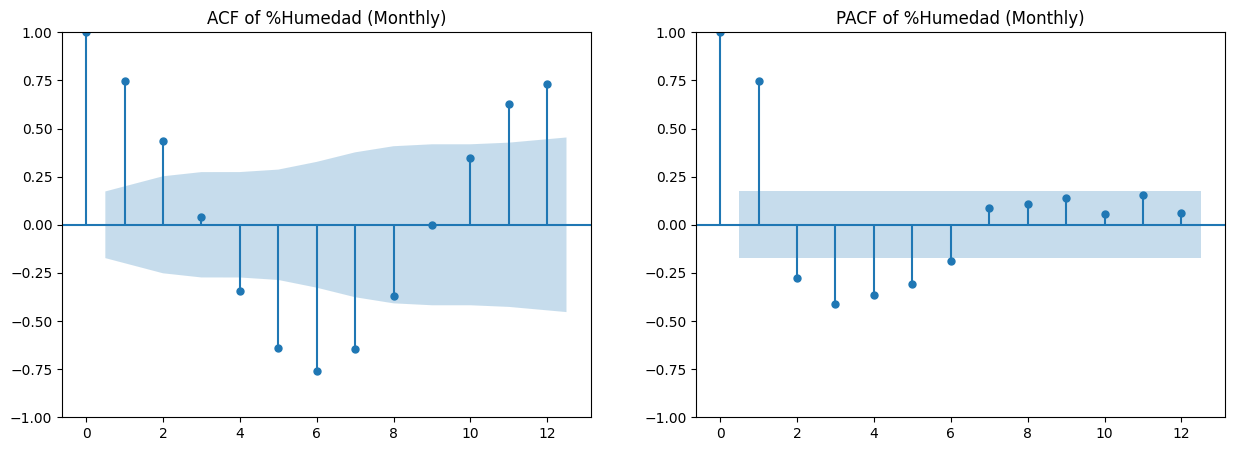

In [39]:
# Autocorrelation Analysis (ACF and PACF)
for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(df[col].dropna(), lags=50, ax=ax1, title=f'ACF of {col} (Daily)')
    plot_pacf(df[col].dropna(), lags=50, ax=ax2, title=f'PACF of {col} (Daily)')
    plt.show()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(df_monthly[col].dropna(), lags=12, ax=ax1, title=f'ACF of {col} (Monthly)')
    plot_pacf(df_monthly[col].dropna(), lags=12, ax=ax2, title=f'PACF of {col} (Monthly)')
    plt.show()

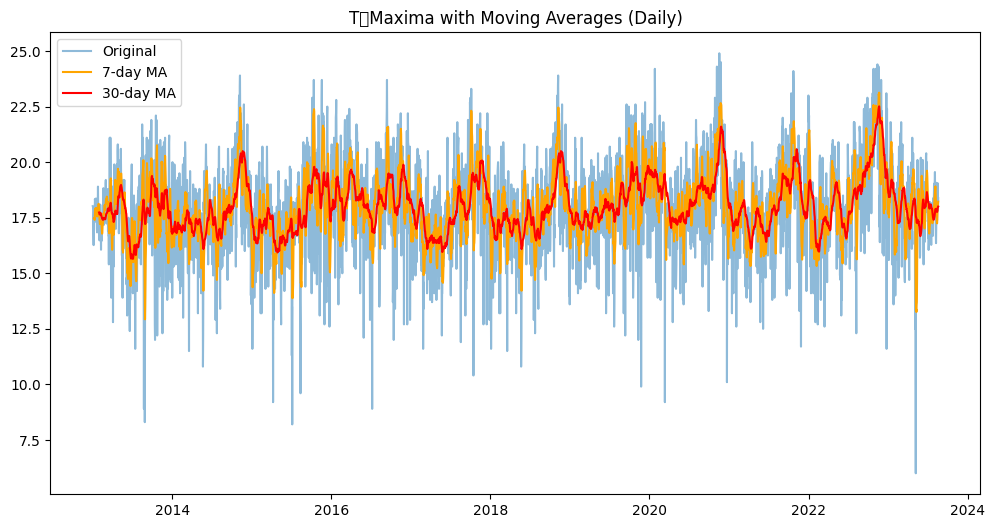

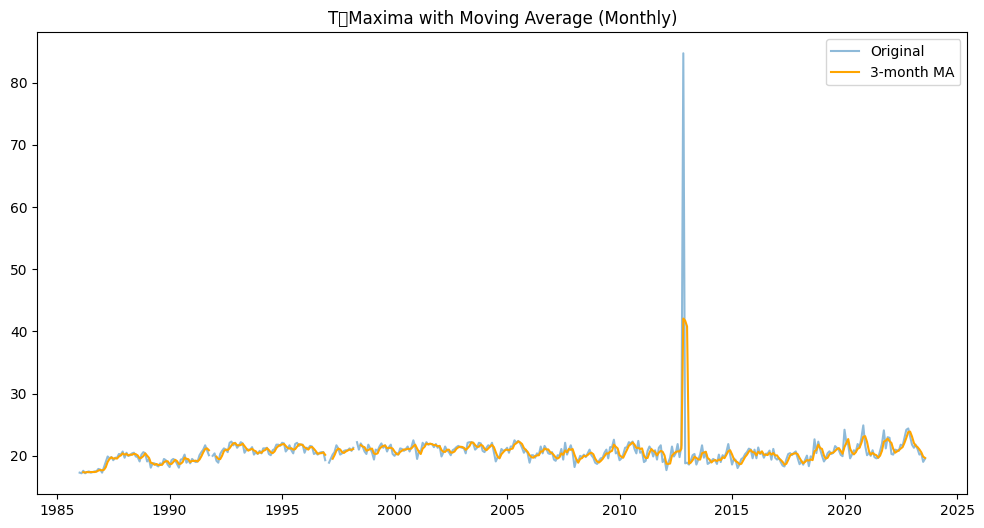

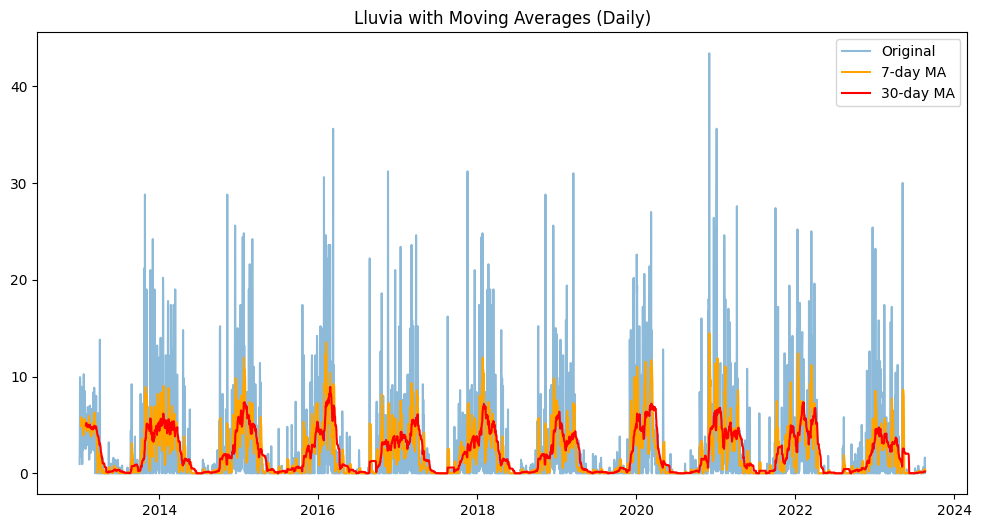

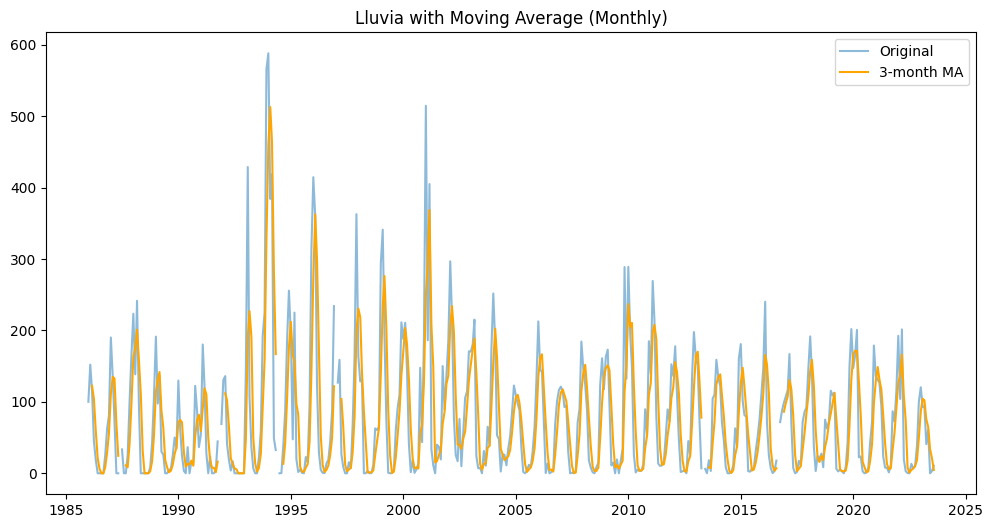

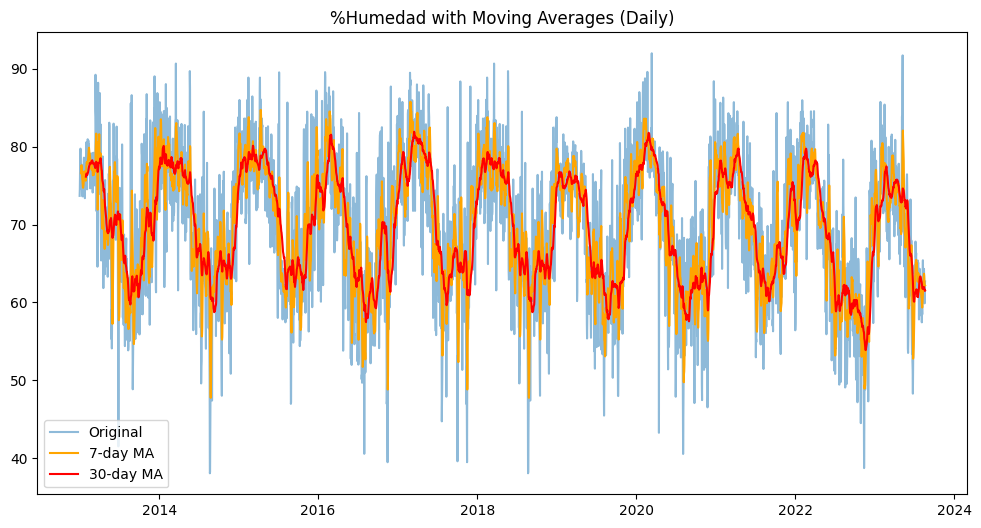

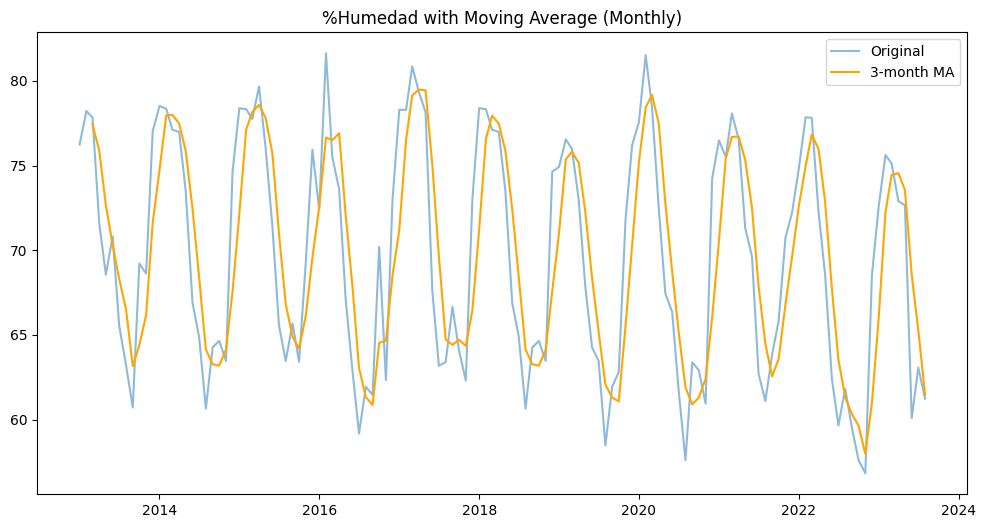

In [40]:
# Moving Average
for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    plt.figure(figsize=(12, 6))
    plt.plot(df[col], label='Original', alpha=0.5)
    plt.plot(df[col].rolling(window=7).mean(), label='7-day MA', color='orange')
    plt.plot(df[col].rolling(window=30).mean(), label='30-day MA', color='red')
    plt.title(f'{col} with Moving Averages (Daily)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly[col], label='Original', alpha=0.5)
    plt.plot(df_monthly[col].rolling(window=3).mean(), label='3-month MA', color='orange')
    plt.title(f'{col} with Moving Average (Monthly)')
    plt.legend()
    plt.show()

In [42]:
# Stationarity Tests
def stationarity_tests(series, name):
    print(f'\nStationarity Tests for {name}:')
    adf_result = adfuller(series.dropna())
    print('ADF Test:')
    print(f'  Statistic: {adf_result[0]:.3f}')
    print(f'  p-value: {adf_result[1]:.3f}')
    print('  Critical Values:', {k: f'{v:.3f}' for k, v in adf_result[4].items()})
    print('  Stationary' if adf_result[1] < 0.05 else '  Non-Stationary (based on ADF)')

    kpss_result = kpss(series.dropna(), regression='c')
    print('KPSS Test:')
    print(f'  Statistic: {kpss_result[0]:.3f}')
    print(f'  p-value: {kpss_result[1]:.3f}')
    print('  Critical Values:', {k: f'{v:.3f}' for k, v in kpss_result[3].items()})
    print('  Stationary' if kpss_result[1] > 0.05 else '  Non-Stationary (based on KPSS)')

for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    stationarity_tests(df[col], f'{col} (Daily)')
    stationarity_tests(df_monthly[col], f'{col} (Monthly)')


Stationarity Tests for TｰMaxima (Daily):
ADF Test:
  Statistic: -8.540
  p-value: 0.000
  Critical Values: {'1%': '-3.432', '5%': '-2.862', '10%': '-2.567'}
  Stationary
KPSS Test:
  Statistic: 0.891
  p-value: 0.010
  Critical Values: {'10%': '0.347', '5%': '0.463', '2.5%': '0.574', '1%': '0.739'}
  Non-Stationary (based on KPSS)

Stationarity Tests for TｰMaxima (Monthly):
ADF Test:
  Statistic: -19.292
  p-value: 0.000
  Critical Values: {'1%': '-3.445', '5%': '-2.868', '10%': '-2.570'}
  Stationary
KPSS Test:
  Statistic: 0.466
  p-value: 0.049
  Critical Values: {'10%': '0.347', '5%': '0.463', '2.5%': '0.574', '1%': '0.739'}
  Non-Stationary (based on KPSS)

Stationarity Tests for Lluvia (Daily):
ADF Test:
  Statistic: -6.500
  p-value: 0.000
  Critical Values: {'1%': '-3.432', '5%': '-2.862', '10%': '-2.567'}
  Stationary
KPSS Test:
  Statistic: 0.086
  p-value: 0.100
  Critical Values: {'10%': '0.347', '5%': '0.463', '2.5%': '0.574', '1%': '0.739'}
  Stationary

Stationarity Tes

In [43]:
# Outlier Detection
def detect_outliers(series, threshold=3):
    z_scores = (series - series.mean()) / series.std()
    outliers = series[np.abs(z_scores) > threshold]
    return outliers

for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    daily_outliers = detect_outliers(df[col])
    monthly_outliers = detect_outliers(df_monthly[col])
    print(f'\nOutliers in {col} (Daily):')
    print(daily_outliers)
    print(f'Outliers in {col} (Monthly):')
    print(monthly_outliers)


Outliers in TｰMaxima (Daily):
Fecha
2013-08-24     8.9
2013-08-28     8.3
2014-03-19    11.5
2014-05-22    10.8
2015-04-09     9.2
2015-07-04    11.3
2015-07-06     8.2
2015-08-13     9.6
2016-07-07     8.9
2017-10-15    10.4
2018-03-19    11.5
2018-05-22    10.8
2019-11-24     9.9
2020-03-12     9.2
2020-11-17    24.9
2020-11-24    24.5
2020-12-22    10.1
2023-05-07    10.9
2023-05-08     6.0
Name: TｰMaxima, dtype: float64
Outliers in TｰMaxima (Monthly):
Fecha
2012-11-01    84.7
Name: TｰMaxima, dtype: float64

Outliers in Lluvia (Daily):
Fecha
2013-10-26    21.2
2013-10-28    28.8
2013-11-02    18.8
2013-11-04    19.0
2013-11-21    18.8
              ... 
2023-02-13    17.4
2023-03-14    15.6
2023-03-19    17.2
2023-05-07    19.6
2023-05-08    30.0
Name: Lluvia, Length: 103, dtype: float64
Outliers in Lluvia (Monthly):
Fecha
1993-02-01    428.7
1993-12-01    565.8
1994-01-01    588.0
1994-02-01    384.1
1994-03-01    418.9
1996-01-01    414.5
1996-02-01    359.5
1997-12-01    362.8
2

In [ ]:
'TｰMaxima', 'Lluvia', '%Humedad'

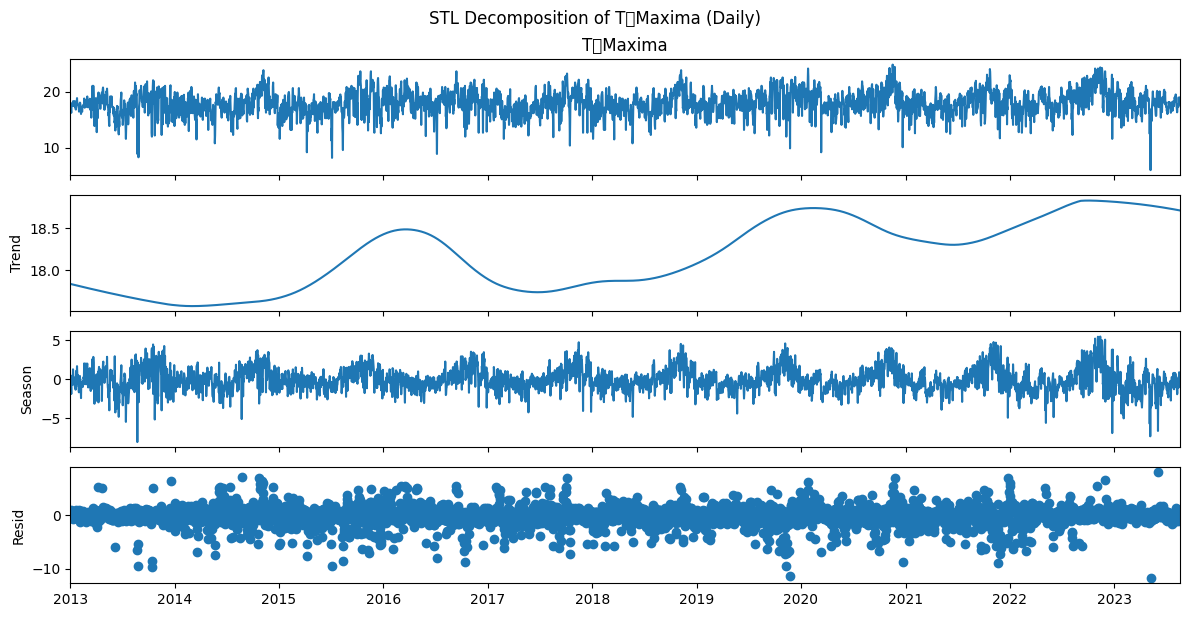

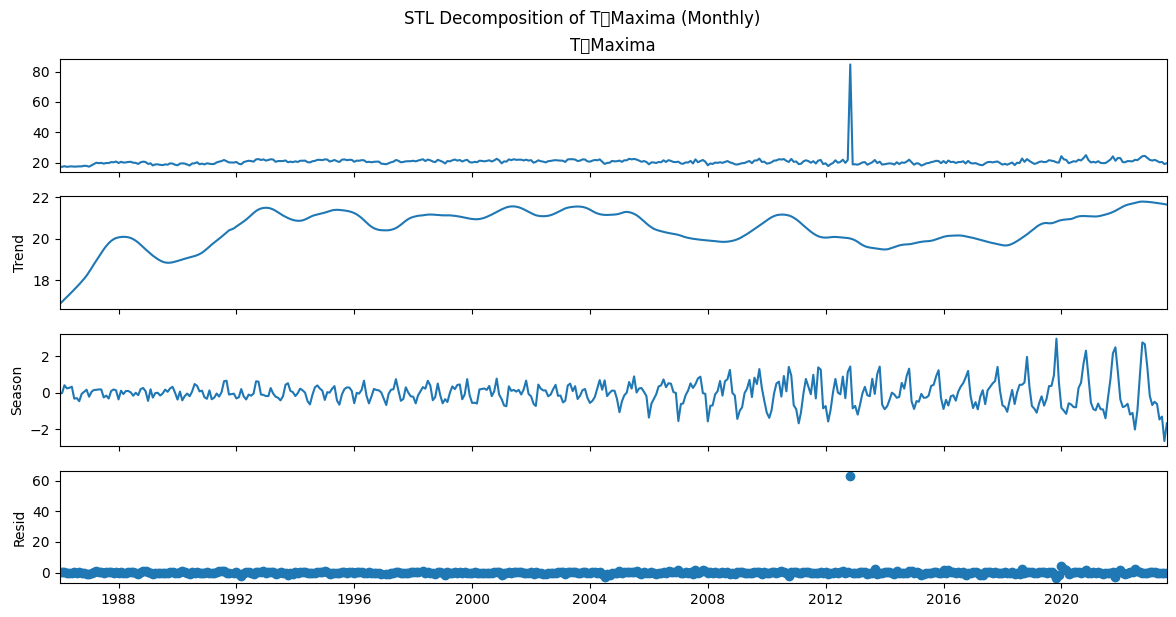

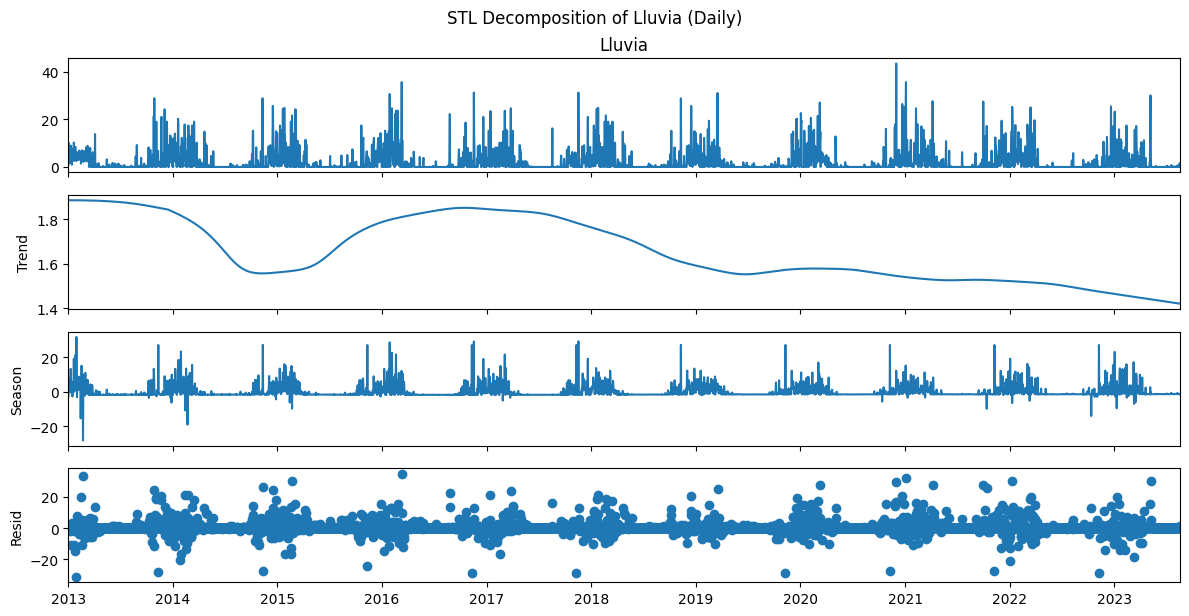

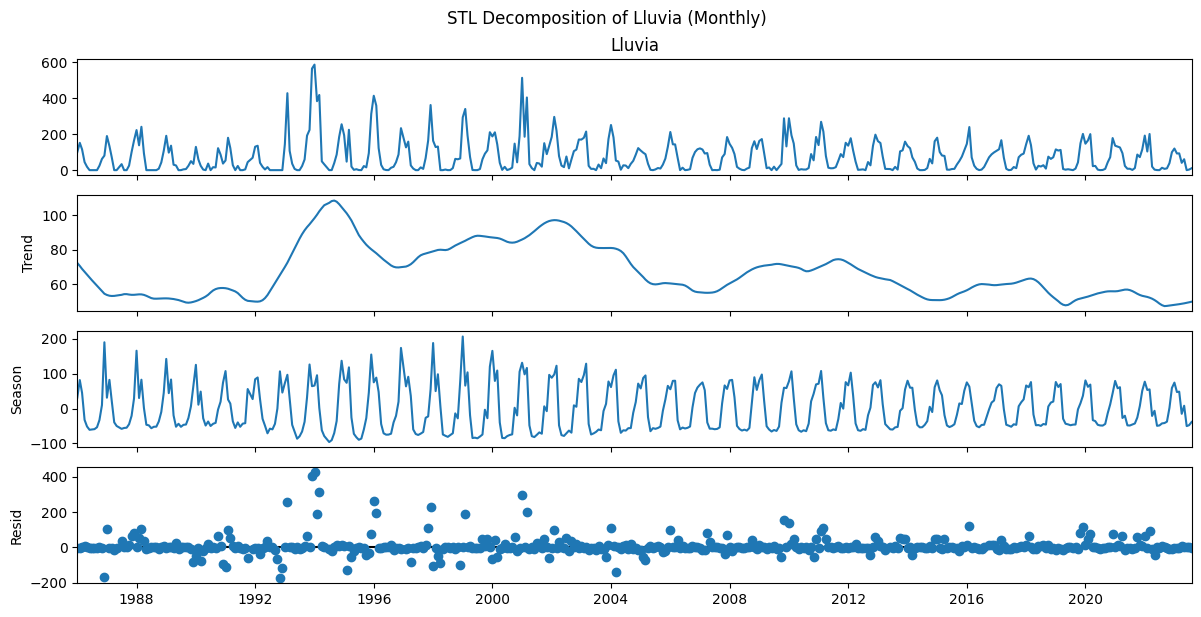

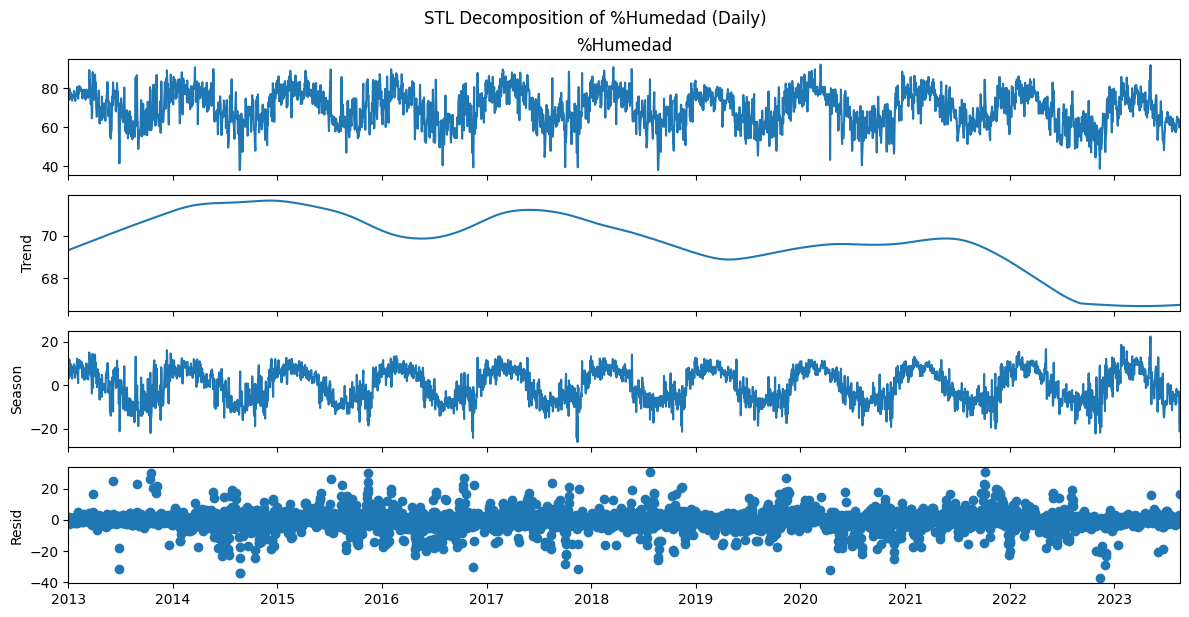

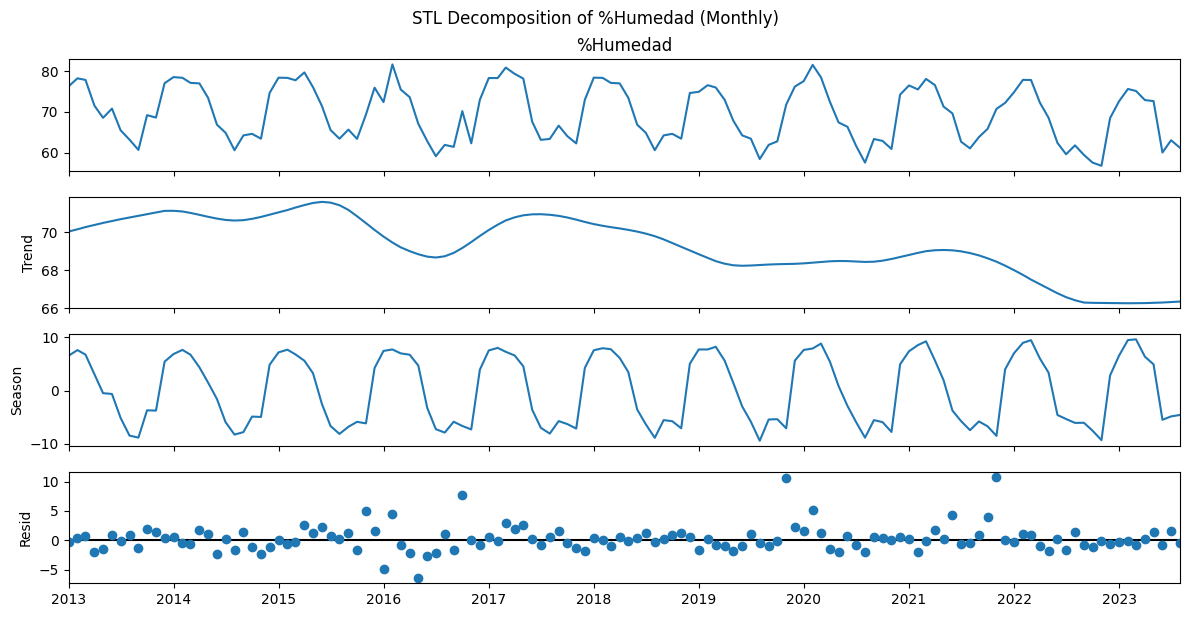

In [44]:
# STL Decomposition
for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    stl = STL(df[col].dropna(), period=365, robust=True)
    result = stl.fit()
    fig = result.plot()
    fig.suptitle(f'STL Decomposition of {col} (Daily)', y=1.02)
    plt.show()

    stl = STL(df_monthly[col].dropna(), period=12, robust=True)
    result = stl.fit()
    fig = result.plot()
    fig.suptitle(f'STL Decomposition of {col} (Monthly)', y=1.02)
    plt.show()

In [45]:
# Seasonal Strength
def seasonal_strength(series, period):
    stl = STL(series.dropna(), period=period, robust=True)
    result = stl.fit()
    seasonal = result.seasonal
    residual = result.resid
    strength = 1 - np.var(residual) / np.var(residual + seasonal)
    return strength

for col in ['TｰMaxima', 'Lluvia', '%Humedad']:
    print(f'\nSeasonal Strength for {col}:')
    print(f'  Daily (period=365): {seasonal_strength(df[col], 365):.3f}')
    print(f'  Monthly (period=12): {seasonal_strength(df_monthly[col], 12):.3f}')


Seasonal Strength for TｰMaxima:
  Daily (period=365): 0.325
  Monthly (period=12): 0.071

Seasonal Strength for Lluvia:
  Daily (period=365): 0.156
  Monthly (period=12): 0.606

Seasonal Strength for %Humedad:
  Daily (period=365): 0.557
  Monthly (period=12): 0.885


# **GEMINI**

In [5]:
# If not already installed in Colab
!pip install pandas matplotlib seaborn statsmodels pmdarima numpy

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [10]:
# --- For Daily Data ---
daily_df = pd.read_csv('TIME-SERIES-Diario-13-23.csv', parse_dates=['Fecha'], index_col='Fecha')
daily_df.index.freq = 'D' # Set frequency for daily data

# --- For Monthly Data ---
monthly_df = pd.read_csv('TIME-SERIES-Mensual-86-23.csv', parse_dates=['Fecha'], index_col='Fecha')
monthly_df.index.freq = 'MS' # Set frequency for monthly data (Month Start)

In [12]:
print(daily_df.head())

print(monthly_df.head())

             Año  Mes  Dia  Tｰ Media  TｰMaxima  TｰMinima  Lluvia  %Humedad
Fecha                                                                     
2013-01-01  2013  Ene    1    12.038    18.022     7.344   0.956    73.676
2013-01-02  2013  Ene    2    12.224    18.000     8.078   3.600    74.553
2013-01-03  2013  Ene    3    11.902    17.822     7.667   9.933    76.719
2013-01-04  2013  Ene    4    10.906    16.778     7.122   8.800    79.117
2013-01-05  2013  Ene    5    11.146    16.267     7.211   4.956    79.746
               Año  Mes  Tｰ Media  TｰMaxima  TｰMinima  Lluvia  %Humedad
Fecha                                                                  
1986-01-01  1986.0  Ene      11.4      17.3       5.4   100.1       NaN
1986-02-01  1986.0  Feb      11.4      17.2       5.6   152.1       NaN
1986-03-01  1986.0  Mar      11.6      17.6       5.5   115.8       NaN
1986-04-01  1986.0  Abr      10.0      17.2       2.9    44.8       NaN
1986-05-01  1986.0  May       7.5      17.4

--- Daily Data Plot ---


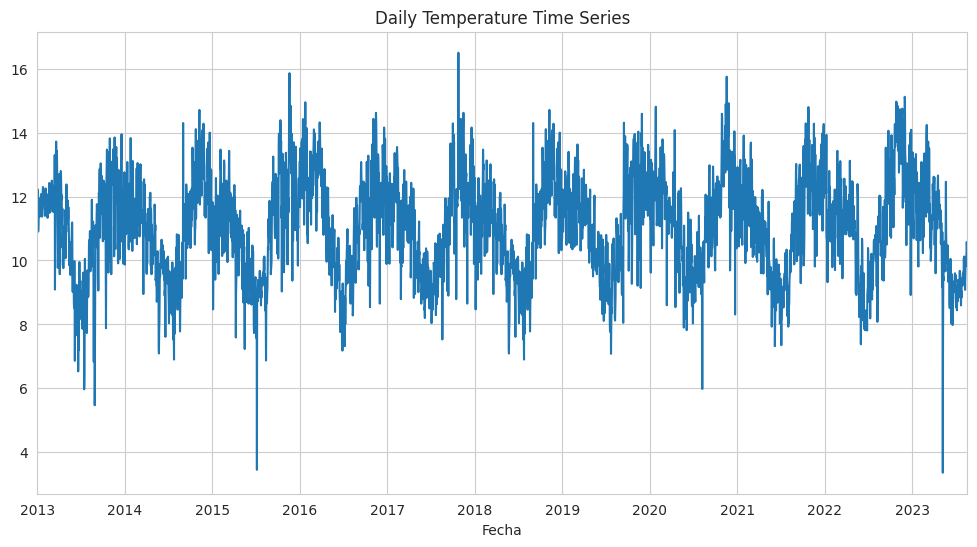


--- Monthly Data Plot ---


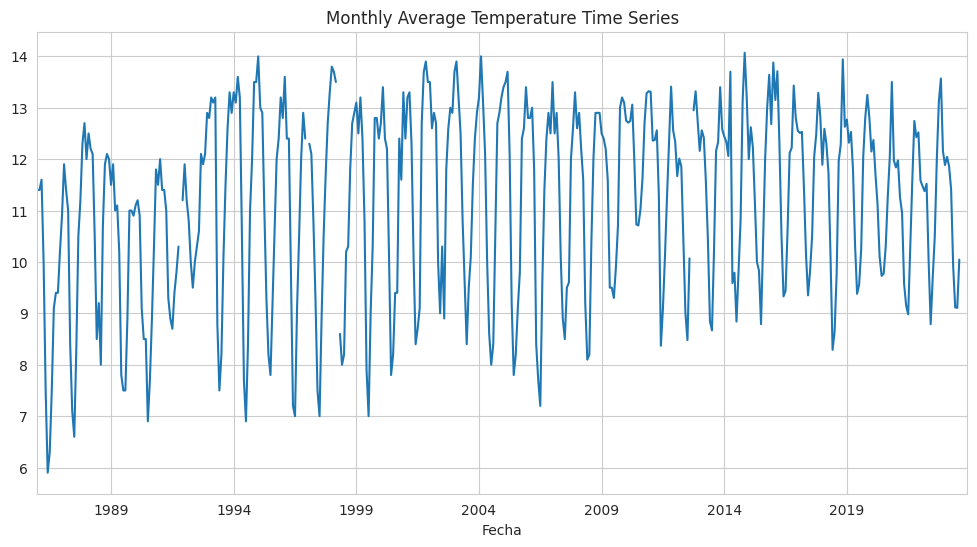

In [13]:
print("--- Daily Data Plot ---")
daily_df['Tｰ Media'].plot(title='Daily Temperature Time Series')
plt.show()

print("\n--- Monthly Data Plot ---")
monthly_df['Tｰ Media'].plot(title='Monthly Average Temperature Time Series')
plt.show()


--- Monthly Average from Daily Data Plot ---


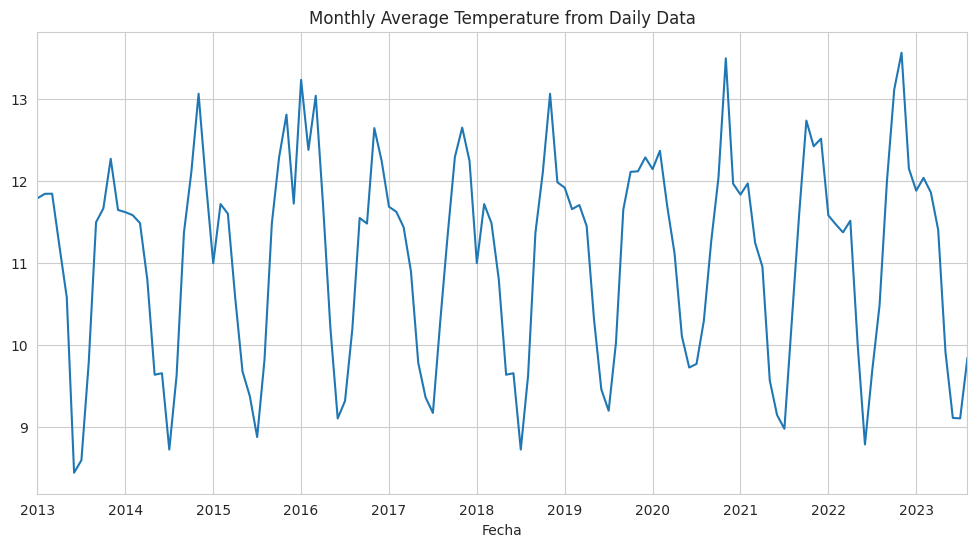

In [14]:
# Example: Resample daily data to monthly average
monthly_avg_daily_data = daily_df['Tｰ Media'].resample('MS').mean()
print("\n--- Monthly Average from Daily Data Plot ---")
monthly_avg_daily_data.plot(title='Monthly Average Temperature from Daily Data')
plt.show()


--- Correlation Matrix (Daily Data) ---


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


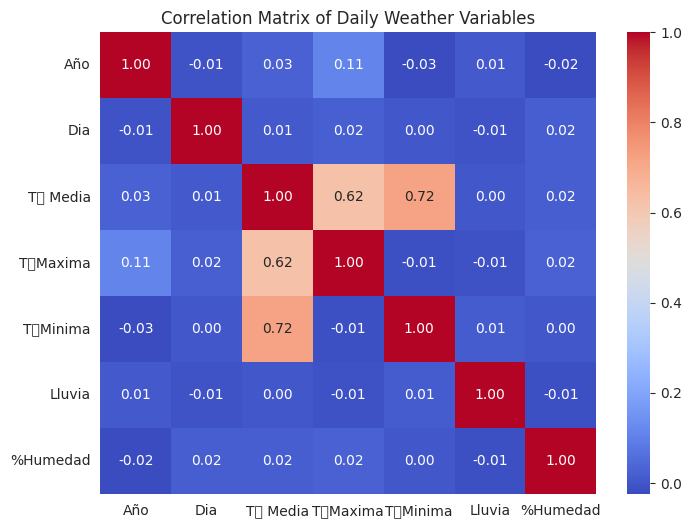


--- Correlation Matrix (Monthly Data) ---


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


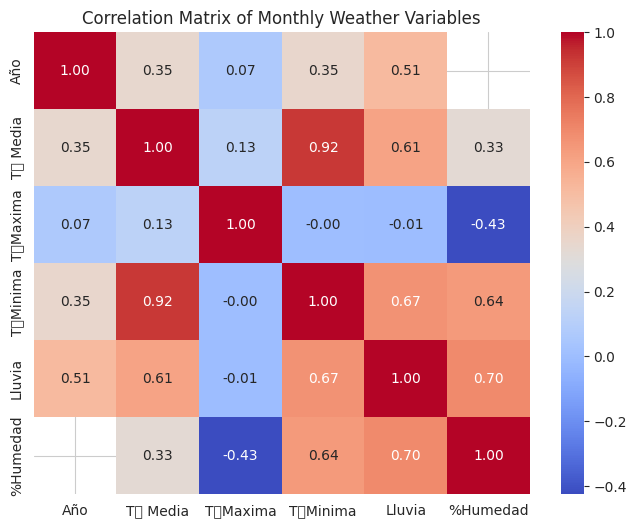

In [16]:
# Example with dummy multiple features for daily_df
print("\n--- Correlation Matrix (Daily Data) ---")
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
daily_numeric_df = daily_df.select_dtypes(include=np.number)
sns.heatmap(daily_numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Weather Variables')
plt.show()

# Similarly for monthly_df if it has multiple features
print("\n--- Correlation Matrix (Monthly Data) ---")
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
monthly_numeric_df = monthly_df.select_dtypes(include=np.number)
sns.heatmap(monthly_numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Monthly Weather Variables')
plt.show()


--- Lag Plot (Daily Temperature) ---


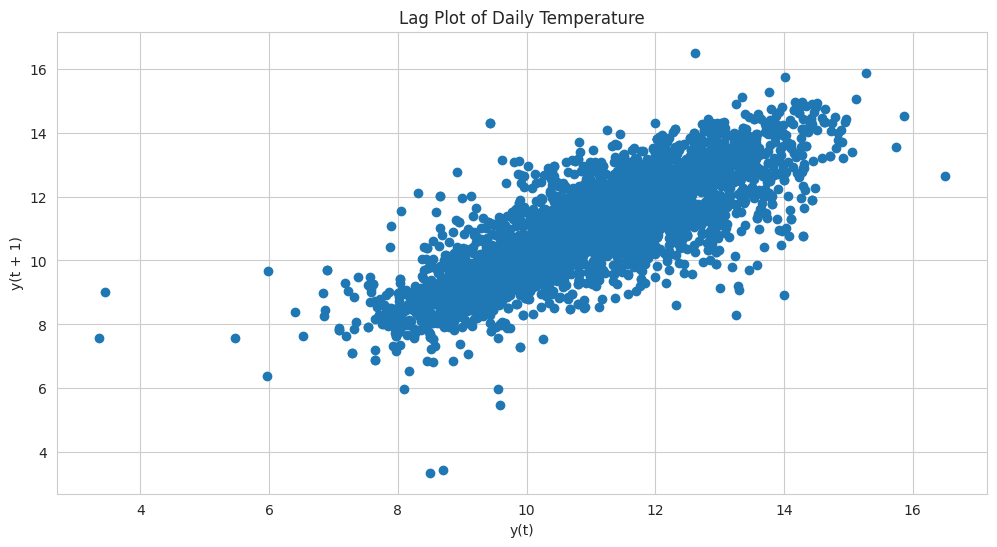


--- Lag Plot (Monthly Average Temperature) ---


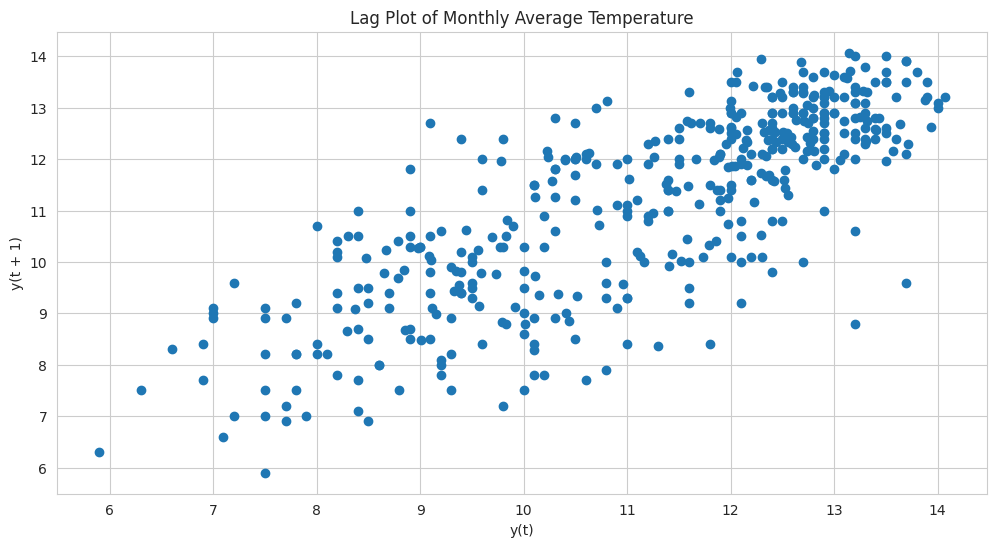

In [17]:
from pandas.plotting import lag_plot

print("\n--- Lag Plot (Daily Temperature) ---")
lag_plot(daily_df['Tｰ Media'])
plt.title('Lag Plot of Daily Temperature')
plt.show()

print("\n--- Lag Plot (Monthly Average Temperature) ---")
lag_plot(monthly_df['Tｰ Media'])
plt.title('Lag Plot of Monthly Average Temperature')
plt.show()


--- Monthly Data Decomposition ---
Could not perform additive decomposition for Monthly Avg Temp: This function does not handle missing values
Consider checking for zeros/negative values for multiplicative decomposition.
Monthly data contains non-positive values. Skipping multiplicative decomposition.

--- Daily Data Decomposition (Annual Seasonality) ---


/tmp/ipython-input-18-3770892156.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  decomposition = seasonal_decompose(series, model=model_type, period=12 if series.index.freq in ['MS', 'M'] else 365 if series.index.freq == 'D' else None) # Adjust period based on frequency
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-18-3770892156.py:8: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


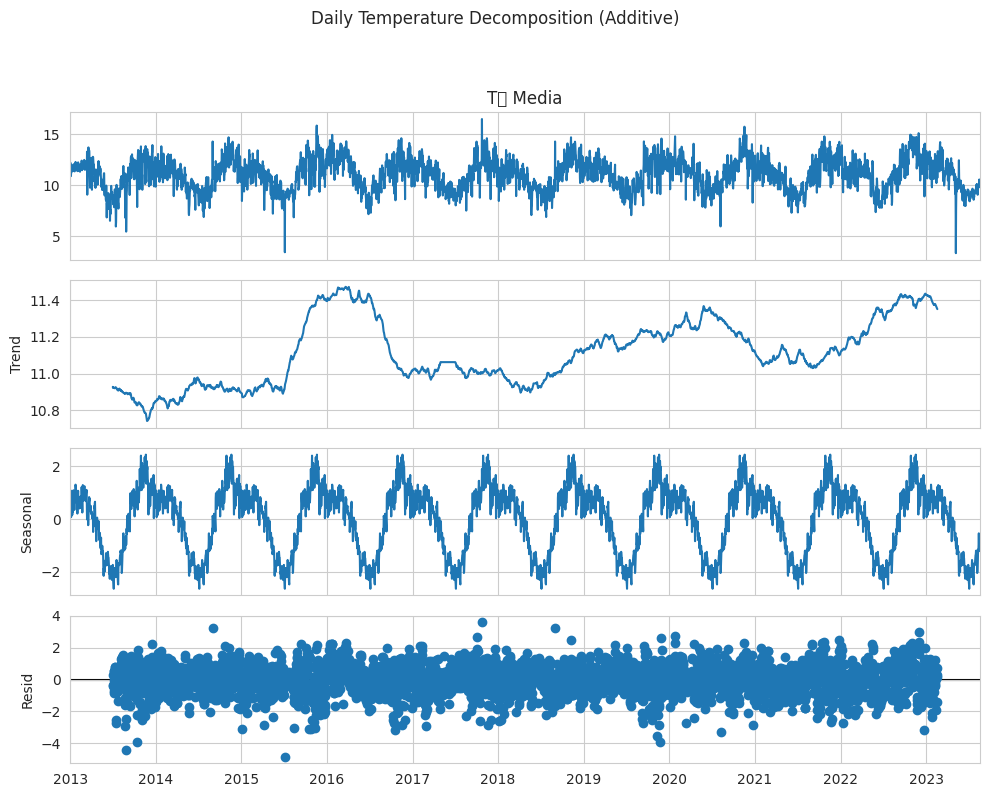

/tmp/ipython-input-18-3770892156.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  decomposition = seasonal_decompose(series, model=model_type, period=12 if series.index.freq in ['MS', 'M'] else 365 if series.index.freq == 'D' else None) # Adjust period based on frequency
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-18-3770892156.py:8: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


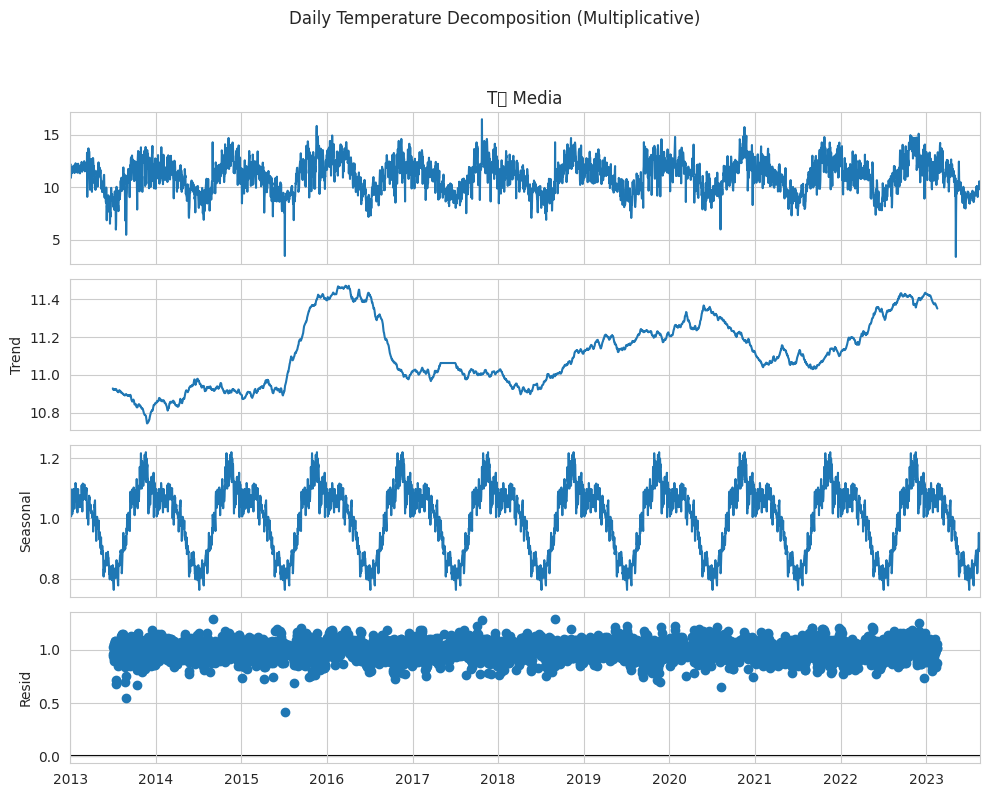

In [18]:
# Function to perform and plot decomposition
def plot_decomposition(series, model_type, title_prefix):
    try:
        decomposition = seasonal_decompose(series, model=model_type, period=12 if series.index.freq in ['MS', 'M'] else 365 if series.index.freq == 'D' else None) # Adjust period based on frequency
        fig = decomposition.plot()
        fig.set_size_inches(10, 8)
        fig.suptitle(f'{title_prefix} Decomposition ({model_type.capitalize()})', y=1.02)
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.show()
        return decomposition
    except Exception as e:
        print(f"Could not perform {model_type} decomposition for {title_prefix}: {e}")
        print("Consider checking for zeros/negative values for multiplicative decomposition.")
        return None

# --- Monthly Data Decomposition ---
print("\n--- Monthly Data Decomposition ---")
# Additive Decomposition for Monthly
monthly_decomp_add = plot_decomposition(monthly_df['Tｰ Media'], 'additive', 'Monthly Avg Temp')

# Multiplicative Decomposition for Monthly (ensure no zeros/negatives)
if (monthly_df['Tｰ Media'] > 0).all():
    monthly_decomp_mult = plot_decomposition(monthly_df['Tｰ Media'], 'multiplicative', 'Monthly Avg Temp')
else:
    print("Monthly data contains non-positive values. Skipping multiplicative decomposition.")
    # If you really need multiplicative with non-positives, consider adding a small constant:
    # monthly_decomp_mult = plot_decomposition(monthly_df['avg_temp'] + 0.001, 'multiplicative', 'Monthly Avg Temp (Adjusted)')


# --- Daily Data Decomposition ---
# For daily data, seasonality can be trickier. You might look for weekly or annual seasonality.
# For annual seasonality, period=365
# For weekly seasonality, period=7
# This example assumes annual seasonality for daily data.
print("\n--- Daily Data Decomposition (Annual Seasonality) ---")
# Additive Decomposition for Daily
daily_decomp_add = plot_decomposition(daily_df['Tｰ Media'], 'additive', 'Daily Temperature')

# Multiplicative Decomposition for Daily (ensure no zeros/negatives)
if (daily_df['Tｰ Media'] > 0).all():
    daily_decomp_mult = plot_decomposition(daily_df['Tｰ Media'], 'multiplicative', 'Daily Temperature')
else:
    print("Daily data contains non-positive values. Skipping multiplicative decomposition.")


--- Moving Averages ---


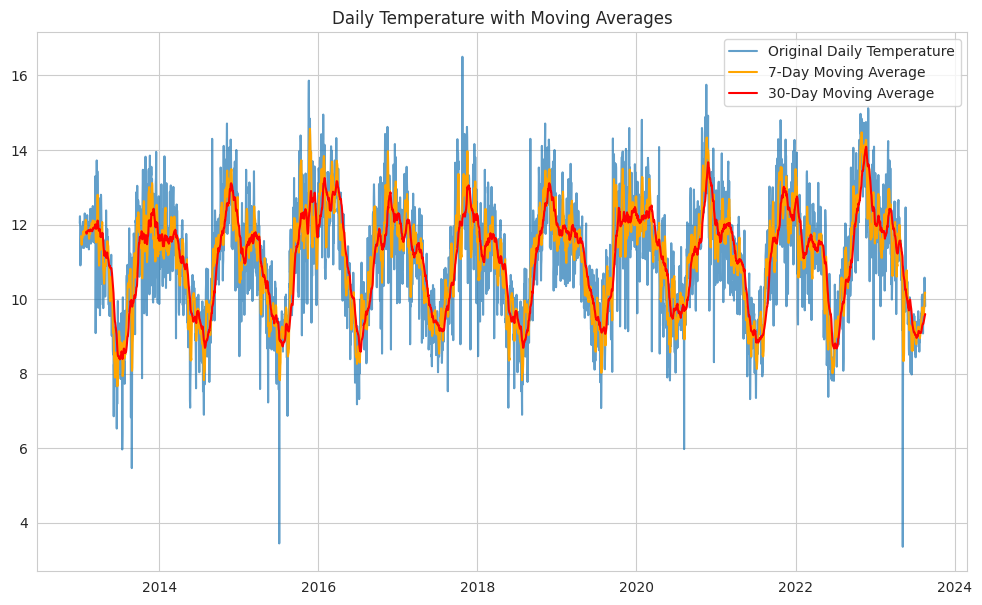

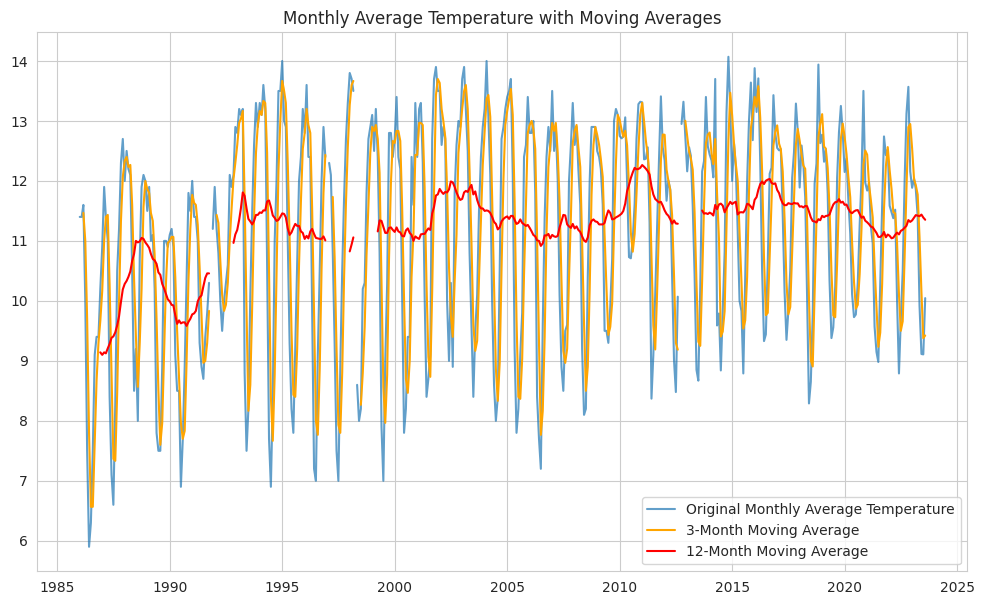

In [19]:
print("\n--- Moving Averages ---")
# Daily Data Moving Averages
daily_df['MA_7_day'] = daily_df['Tｰ Media'].rolling(window=7).mean()
daily_df['MA_30_day'] = daily_df['Tｰ Media'].rolling(window=30).mean()

plt.figure(figsize=(12, 7))
plt.plot(daily_df['Tｰ Media'], label='Original Daily Temperature', alpha=0.7)
plt.plot(daily_df['MA_7_day'], label='7-Day Moving Average', color='orange')
plt.plot(daily_df['MA_30_day'], label='30-Day Moving Average', color='red')
plt.title('Daily Temperature with Moving Averages')
plt.legend()
plt.show()

# Monthly Data Moving Averages
monthly_df['MA_3_month'] = monthly_df['Tｰ Media'].rolling(window=3).mean()
monthly_df['MA_12_month'] = monthly_df['Tｰ Media'].rolling(window=12).mean()

plt.figure(figsize=(12, 7))
plt.plot(monthly_df['Tｰ Media'], label='Original Monthly Average Temperature', alpha=0.7)
plt.plot(monthly_df['MA_3_month'], label='3-Month Moving Average', color='orange')
plt.plot(monthly_df['MA_12_month'], label='12-Month Moving Average', color='red')
plt.title('Monthly Average Temperature with Moving Averages')
plt.legend()
plt.show()


--- Autocorrelation and Partial Autocorrelation (Daily Data) ---


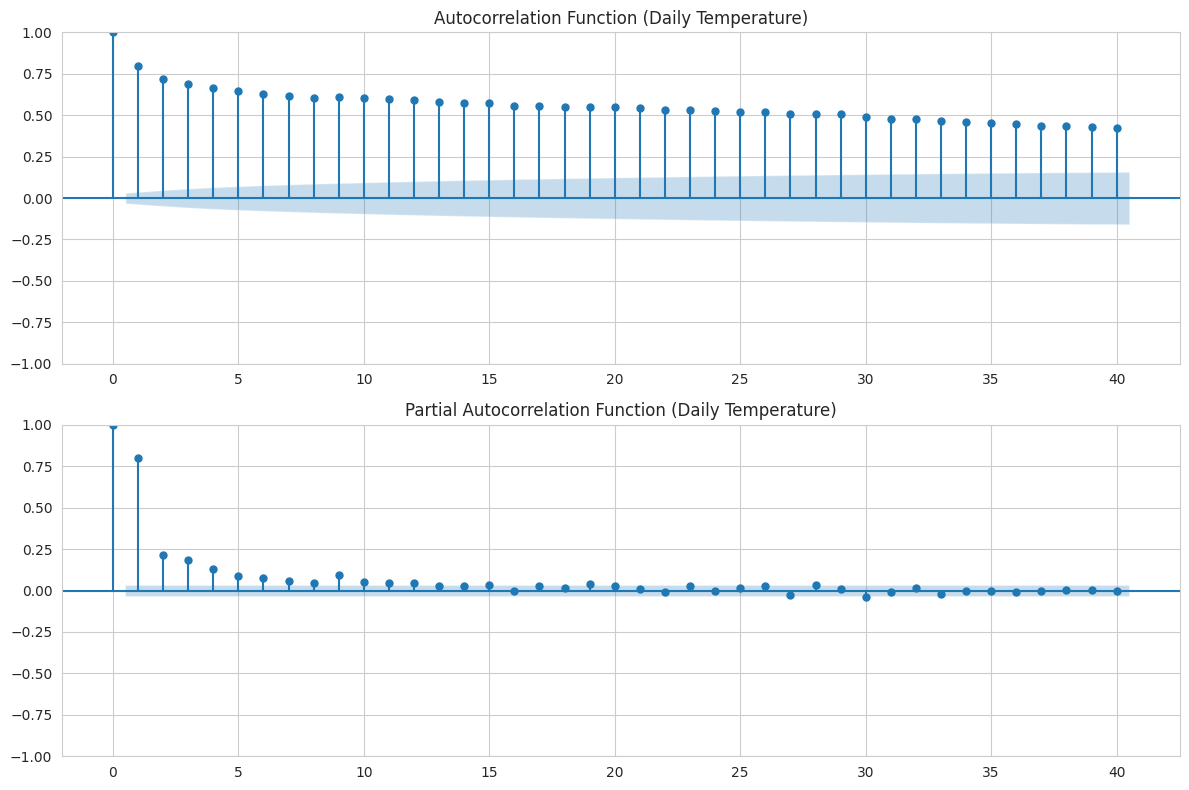


--- Autocorrelation and Partial Autocorrelation (Monthly Data) ---


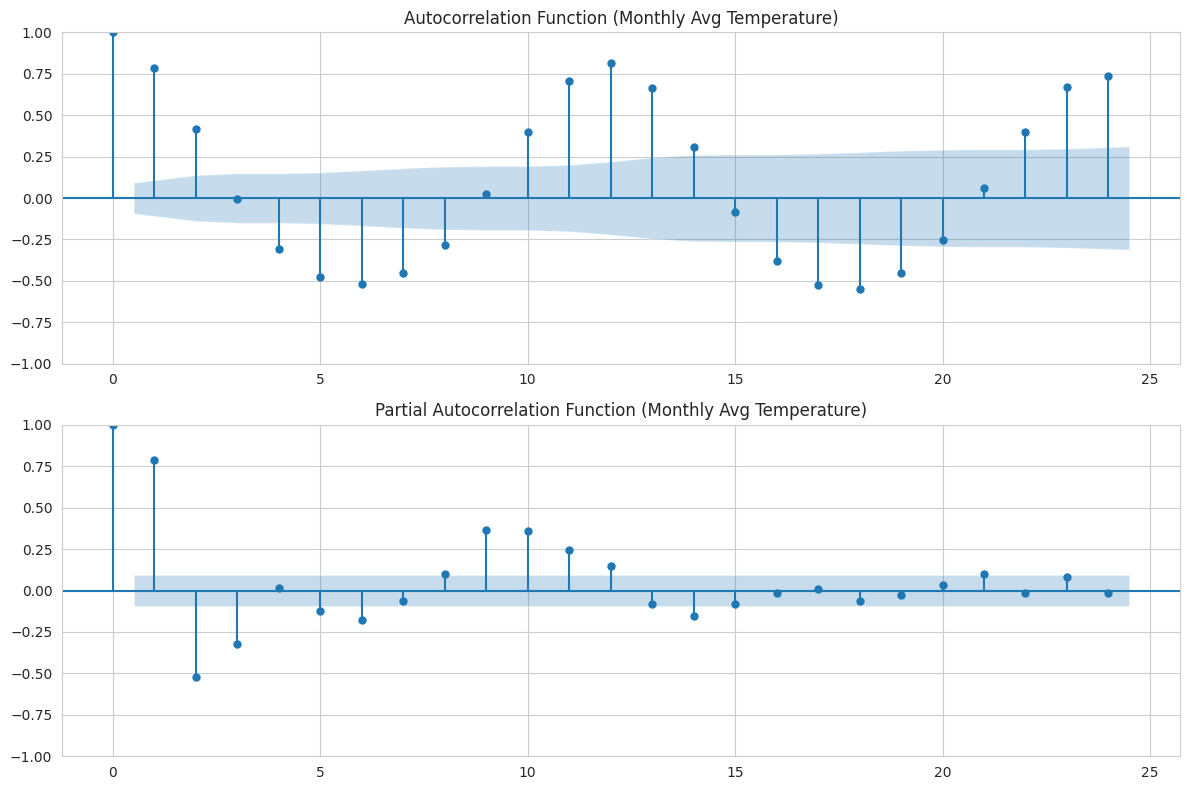

In [20]:
print("\n--- Autocorrelation and Partial Autocorrelation (Daily Data) ---")
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_df['Tｰ Media'].dropna(), lags=40, ax=axes[0], title='Autocorrelation Function (Daily Temperature)')
plot_pacf(daily_df['Tｰ Media'].dropna(), lags=40, ax=axes[1], title='Partial Autocorrelation Function (Daily Temperature)')
plt.tight_layout()
plt.show()

print("\n--- Autocorrelation and Partial Autocorrelation (Monthly Data) ---")
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(monthly_df['Tｰ Media'].dropna(), lags=24, ax=axes[0], title='Autocorrelation Function (Monthly Avg Temperature)') # Lags up to 2 years for monthly
plot_pacf(monthly_df['Tｰ Media'].dropna(), lags=24, ax=axes[1], title='Partial Autocorrelation Function (Monthly Avg Temperature)')
plt.tight_layout()
plt.show()

In [21]:
def adf_test(series, name='Time Series'):
    print(f'\n--- ADF Test for {name} ---')
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value:.4f}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject H0. Time series is Stationary.")
    else:
        print("Weak evidence against the null hypothesis, fail to reject H0. Time series is Non-Stationary.")

print("\n--- Stationarity Analysis ---")
adf_test(daily_df['Tｰ Media'], 'Daily Temperature')
adf_test(monthly_df['Tｰ Media'], 'Monthly Average Temperature')

# If non-stationary, consider differencing
# For example, first-order differencing:
# daily_df['temperature_diff'] = daily_df['temperature'].diff().dropna()
# adf_test(daily_df['temperature_diff'], 'Daily Temperature (Differenced)')


--- Stationarity Analysis ---

--- ADF Test for Daily Temperature ---
ADF Statistic: -4.3550
p-value: 0.0004
#Lags Used: 29.0000
Number of Observations Used: 3853.0000
Strong evidence against the null hypothesis, reject H0. Time series is Stationary.

--- ADF Test for Monthly Average Temperature ---
ADF Statistic: -3.9220
p-value: 0.0019
#Lags Used: 14.0000
Number of Observations Used: 433.0000
Strong evidence against the null hypothesis, reject H0. Time series is Stationary.



--- Seasonal Subseries Plot (Monthly Average Temperature) ---


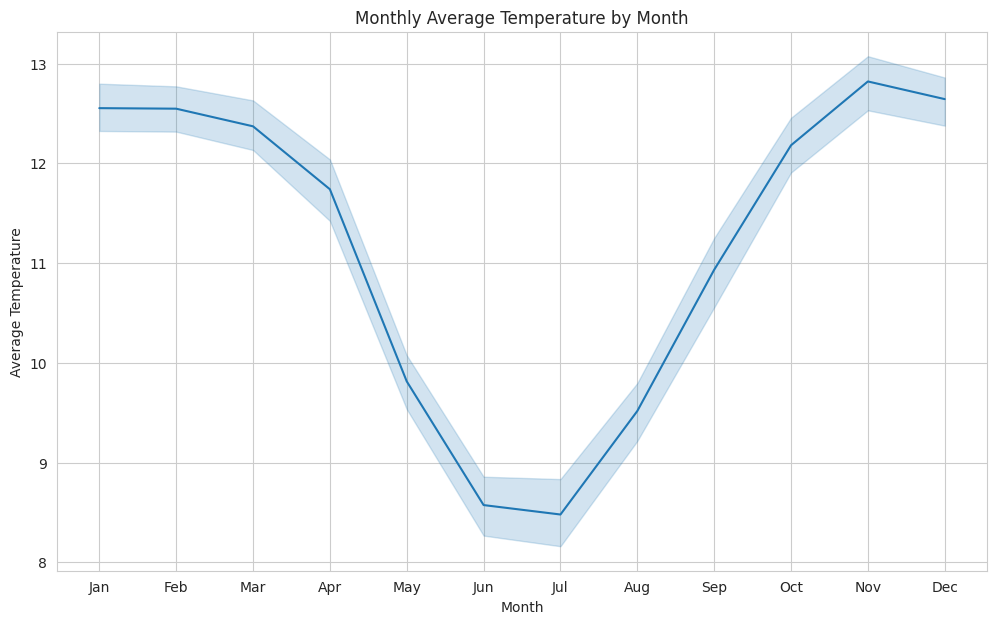


--- Seasonal Subseries Plot (Daily Temperature by Month) ---


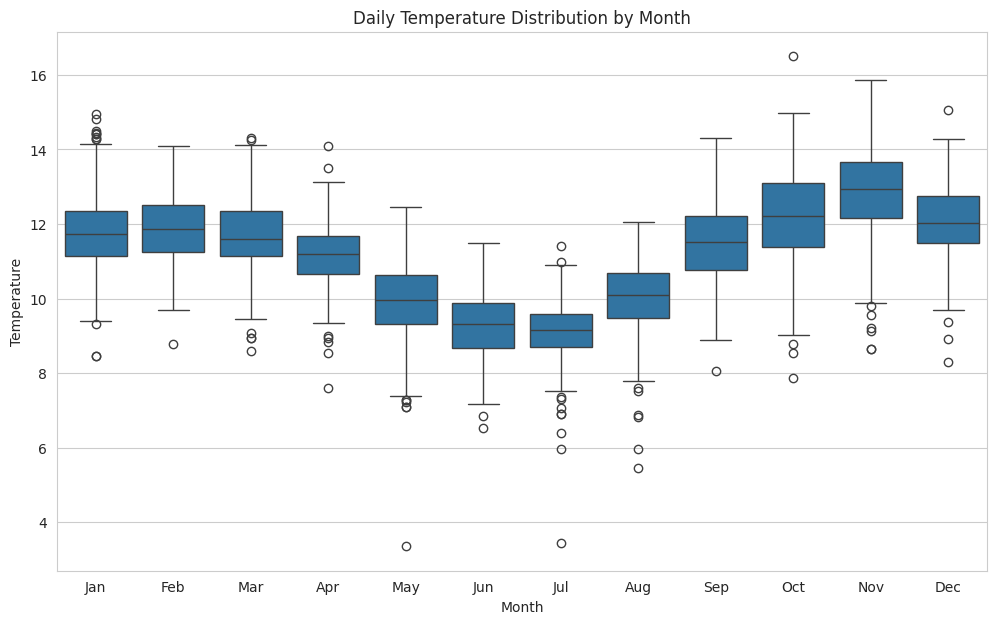


--- Seasonal Subseries Plot (Daily Temperature by Day of Week) ---


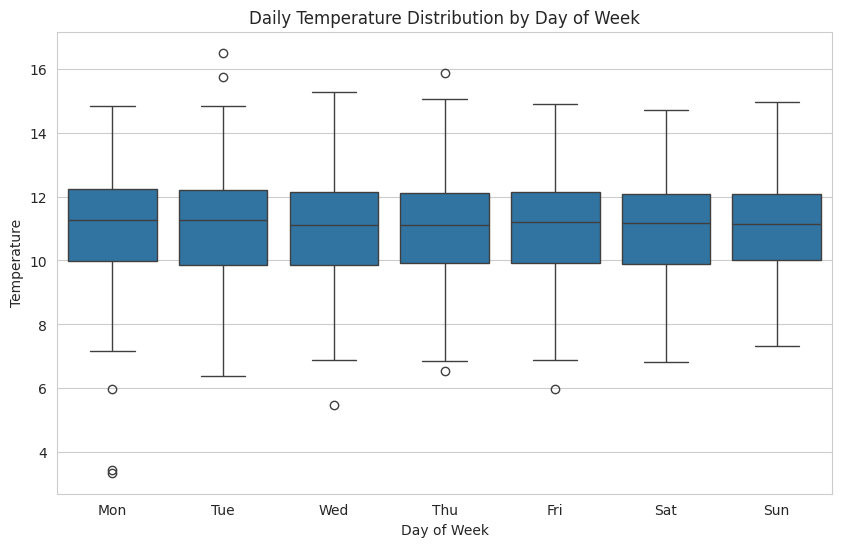

In [22]:
print("\n--- Seasonal Subseries Plot (Monthly Average Temperature) ---")
# For monthly data, examine patterns across months
monthly_df['month'] = monthly_df.index.month
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='Tｰ Media', data=monthly_df)
plt.title('Monthly Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# For daily data, you might examine patterns by day of the week, or by month if annual seasonality is strong
print("\n--- Seasonal Subseries Plot (Daily Temperature by Month) ---")
daily_df['month'] = daily_df.index.month
plt.figure(figsize=(12, 7))
sns.boxplot(x='month', y='Tｰ Media', data=daily_df)
plt.title('Daily Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

print("\n--- Seasonal Subseries Plot (Daily Temperature by Day of Week) ---")
daily_df['day_of_week'] = daily_df.index.dayofweek # Monday=0, Sunday=6
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='Tｰ Media', data=daily_df)
plt.title('Daily Temperature Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Temperature')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


--- Outlier Detection ---
Daily Temperature Outliers (Z-score > 3): 
             Año  Mes  Dia  Tｰ Media  TｰMaxima  TｰMinima     Lluvia  \
Fecha                                                                 
2013-07-15  2013  Jul   15      5.97      11.6       2.1   5.289254   
2013-07-16  2013  Jul   16      6.40      13.7       0.5  10.379829   
2013-08-28  2013  Ago   28      5.47       8.3       3.8  13.588992   
2015-07-06  2015  Jul    6      3.45       8.2       0.3   5.602040   
2015-11-19  2015  Nov   19     15.86      23.7       8.5   5.091229   
2017-10-24  2017  Oct   24     16.50      20.8      14.8   7.191597   
2020-08-07  2020  Ago    7      5.98      16.8       0.7  11.911934   
2020-11-17  2020  Nov   17     15.75      24.9       8.3  10.612012   
2023-05-08  2023  May    8      3.36       6.0       0.7   8.996953   

             %Humedad   MA_7_day  MA_30_day  month  day_of_week  
Fecha                                                            
2013-07-15  73.8

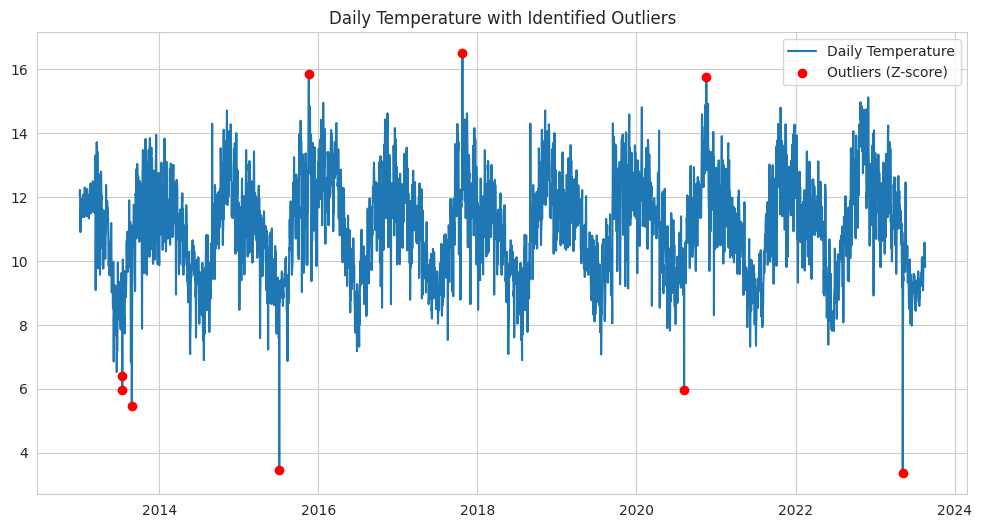

In [25]:
print("\n--- Outlier Detection ---")
# Simple Z-score based outlier detection (more advanced methods may be needed)
# Be cautious with this as Z-score assumes normality
mean = daily_df['Tｰ Media'].mean()
std = daily_df['Tｰ Media'].std()
outliers_zscore = daily_df[(np.abs(daily_df['Tｰ Media'] - mean) > 3 * std)]
print(f"Daily Temperature Outliers (Z-score > 3): \n{outliers_zscore}")

# Using IQR for monthly data
Q1 = monthly_df['Tｰ Media'].quantile(0.25)
Q3 = monthly_df['Tｰ Media'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR
outliers_iqr = monthly_df[(monthly_df['Tｰ Media'] < outlier_threshold_lower) | (monthly_df['Tｰ Media'] > outlier_threshold_upper)]
print(f"\nMonthly Average Temperature Outliers (IQR Method): \n{outliers_iqr}")

# Plotting outliers on the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_df['Tｰ Media'], label='Daily Temperature')
plt.scatter(outliers_zscore.index, outliers_zscore['Tｰ Media'], color='red', label='Outliers (Z-score)', zorder=5)
plt.title('Daily Temperature with Identified Outliers')
plt.legend()
plt.show()